# How food shapes the World - Ada project

With 7.7 billion people around the world in 2019, food demand outbreak has raised serious concerns regarding productive agricultural land availability. As for now cultivable surface expansion has been the only real solution, this project aims at providing insights on how this problematic is currently shaping the world’s surface as we know it. Investigation will first focus on the kind of environment that are being impinged on. Moving on to the “destructive” impact of certain foodstuffs and diet trends, correlating with international trade flows. This study relies on FAOSTAT data set from the United Nation, helping us in the process.
We endeavor at providing an exhaustive visualization of the world under growing food reshaping pressure. Key features will be surface evolution across time and space, selected crops impact as well as involved parties and areas. Tackling all of the above with both social awareness and self consciousness concerns.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup

## Opening the dataset

First of all, we need to open the dataset on which we are working. That is, loading it and displaying as much of it as possible to get a better view from it.

In [6]:
datapath = "Data/global-food-agriculture-statistics/"
current_fao = "current_FAO/raw_files/"

savanna = pd.read_csv(datapath + current_fao + "Emissions_Agriculture_Burning_Savanna_E_All_data_(Norm).csv", sep=",", encoding="latin_1")  # Less savanna
crops = pd.read_csv(datapath + "fao_data_crops_data.csv", sep=",", encoding="UTF-8")                                                     # Where every products are planted
forests = pd.read_csv(datapath + current_fao + "Emissions_Land_Use_Forest_Land_E_All_Data_(Norm).csv", sep=",", encoding="latin_1")         # Less forests
livestock = pd.read_csv(datapath + current_fao + "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", sep=",", encoding="latin_1")          # Imports and exports 
item_codes=pd.read_csv(datapath + current_fao +"export_items_1574515779.csv",sep=";", encoding="latin_1")#FAO commodities item codes 

We will now scrap a another dataset, investigate each dataset and start to correlate them depending on the questions we want to answer for Milestone 3. 

### Table of contents

1. [Countries areas](#areas)
2. [Savanna](#savanna) 
3. [Forests](#forests)
4. [Biomes](#merge)
5. [Crops](#crops)
6. [Livestock](#livestock)
7. [Data to answer the questions](#questions)
8. [World Maps](#maps)
9. [Correlations](#correlations)
10. [Heat Maps](#heat)
11. [Best crop for each country](#best_crop)

<a id="areas"></a>
# Countries areas

Since we will need it later, we start by webscraping the areas of all coutries from wikipedia website. We store clean the dataset and store it in a dataframe :

In [7]:
URL = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area" # wikipedia URL to get the information

r = requests.get(URL)

soup = BeautifulSoup(r.text, 'html.parser')

In [8]:
byCountries = soup.find_all('tr') # each rows for each country is between 'tr' tags
byCountries = byCountries[2:-7]   # remove rows containing no usefull information
byCountries[0]

<tr>
<td><span data-sort-value="7000100000000000000♠">1</span></td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:25px;"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/23px-Flag_of_Russia.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/35px-Flag_of_Russia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/45px-Flag_of_Russia.svg.png 2x" width="23"/></span> <a href="/wiki/Russia" title="Russia">Russia</a></td>
<td><span data-sort-value="7013170982460000000♠"></span>17,098,246<br/>(6,601,670)</td>
<td><span data-sort-value="7013163777420000000♠"></span>16,377,742<br/>(6,323,482)</td>
<td><span data-sort-value="7011720500000000000♠"></span>720,500<br/>(278,200)</td>
<td>4.21</td>
<td style="text-align:left;">Largest country in the world (10.995% of the world'

In [9]:
country_areas = []
for r in byCountries:
    tds = r.find_all('td')  
    country = r.find('a').get('title') # Get the name of the country
    values = []
    for p in tds[2:5]: # The values of interest are stored in the second to fourth td tags
        if(len(p.contents) > 0):
            if isinstance(p.contents[1], str): # consider the column if it is a string (and not a tag or something else)
                values += [p.contents[1]]
            else:
                values += "Not determined"
        else:
            values += ["-"]
    country_areas.append({"Country" : country, "Total(km2)" : values[0], "Land(km2)" : values[1], "Water(km2)" : values[2]})

In [10]:
country_areas = pd.DataFrame.from_dict(country_areas)
country_areas

Country  Total(km2)   Land(km2) Water(km2)
0                         Russia  17,098,246  16,377,742    720,500
1                     Antarctica  14,000,000  14,000,000          0
2                         Canada   9,984,670   9,093,507    891,163
3                          China   9,596,961   9,326,410    270,550
4                  United States   9,525,067   9,147,593    377,424
..                           ...         ...         ...        ...
256            Clipperton Island           6           2          4
257  Ashmore and Cartier Islands           5           5          0
258              Spratly Islands         < 5         < 5          0
259            Coral Sea Islands         < 3         < 3          0
260                       Monaco        2.02        2.02          0

[261 rows x 4 columns]

In [11]:
# Clean the dataframe (cast numbers from string to float, remove symbols like " ' " or "<" and rename non existent data)
country_areas["Total(km2)"] = country_areas["Total(km2)"].apply(lambda x: re.sub(r"[^0-9.]", "", x))
country_areas["Land(km2)"] = country_areas["Land(km2)"].apply(lambda x: re.sub(r"[^0-9.]", "", x))
country_areas["Water(km2)"] = country_areas["Water(km2)"].apply(lambda x: re.sub(r"[^0-9.]", "", x))

country_areas["Total(km2)"] = country_areas["Total(km2)"].apply(lambda x: "Not determined" if x == '' else float(x))
country_areas["Land(km2)"] = country_areas["Land(km2)"].apply(lambda x: "Not determined" if x == '' else float(x))
country_areas["Water(km2)"] = country_areas["Water(km2)"].apply(lambda x: "Notdetermined" if x == '' else float(x))

country_areas = country_areas.drop_duplicates(subset="Country", keep="first").sort_values(by="Total(km2)", ascending=False)

In [12]:
# Convert km2 in Ha and rename (we don't need the unit anymore, as we know that we use Ha for all datasets)
country_areas['Total(km2)'] = country_areas['Total(km2)']*100
country_areas['Land(km2)'] = country_areas['Land(km2)']*100
country_areas['Water(km2)'] = country_areas['Water(km2)']*100
#as everything is in ha  we just remove the units from the titles:
country_areas = country_areas.rename(columns={"Total(km2)":"Total", "Land(km2)":"Land", "Water(km2)":"Water"})

In [13]:
country_areas

Country         Total         Land        Water
0                         Russia  1.709825e+09  1.63777e+09    7.205e+07
1                     Antarctica  1.400000e+09      1.4e+09            0
2                         Canada  9.984670e+08  9.09351e+08  8.91163e+07
3                          China  9.596961e+08  9.32641e+08   2.7055e+07
4                  United States  9.525067e+08  9.14759e+08  3.77424e+07
..                           ...           ...          ...          ...
256            Clipperton Island  6.000000e+02          200          400
257  Ashmore and Cartier Islands  5.000000e+02          500            0
258              Spratly Islands  5.000000e+02          500            0
259            Coral Sea Islands  3.000000e+02          300            0
260                       Monaco  2.020000e+02          202            0

[259 rows x 4 columns]

In [14]:
# Write USA in the same way as in the other datasets.
country_areas['Country']=country_areas['Country'].str.replace('United States', 'United States of America', regex=False)
country_areas['Country']=country_areas['Country'].str.replace('Russian Federation', 'Russia', regex=False)
#When land area not known, we set the same value as for the total are (good approximation)Somalia
country_areas.loc[18, 'Land'] = (country_areas.loc[18, 'Total'])
country_areas.loc[44, 'Land'] = (country_areas.loc[44, 'Total'])
country_areas.loc[251, 'Land'] = (country_areas.loc[251, 'Total'])
country_areas.loc[176, 'Land'] = (country_areas.loc[176, 'Total'])
country_areas.loc[254, 'Land'] = (country_areas.loc[254, 'Total'])
country_areas.loc[95, 'Land'] = (country_areas.loc[95, 'Total'])
country_areas.loc[194, 'Land'] = (country_areas.loc[194, 'Total'])
country_areas.loc[186, 'Land'] = (country_areas.loc[186, 'Total'])
country_areas.loc[187, 'Land'] = (country_areas.loc[187, 'Total'])
country_areas.loc[226, 'Land'] = (country_areas.loc[226, 'Total'])
country_areas.loc[172, 'Land'] = (country_areas.loc[172, 'Total'])
country_areas.loc[183, 'Land'] = (country_areas.loc[183, 'Total'])
country_areas.head()

Country         Total         Land        Water
0                    Russia  1.709825e+09  1.63777e+09    7.205e+07
1                Antarctica  1.400000e+09      1.4e+09            0
2                    Canada  9.984670e+08  9.09351e+08  8.91163e+07
3                     China  9.596961e+08  9.32641e+08   2.7055e+07
4  United States of America  9.525067e+08  9.14759e+08  3.77424e+07

In [15]:
export_path = r'Data\country_areas.csv'
export_csv = country_areas.to_csv(export_path, index = None, header=True)

<a id="savanna"></a>
# Savanna

In [16]:
savanna.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [17]:
savanna.head(1)

Country Code      Country  Item Code     Item  Element Code      Element  \
0             2  Afghanistan       6760  Savanna          7246  Burned Area   

   Year Code  Year Unit   Value Flag  
0       1990  1990   Ha  0.9251   Fc

#### Description:
In this dataframe we have the following columns:
- Country Code: One specific number per country
- Country: list of country
- Item Code: One specific number per Item
- Item: A list of different ecosystems
- Element Code: One specific munber per element
- Element: What was actually calculated, measured or estimated
- Year Code: One specific number per year (same as the year)
- Year: The actual year
- Unit: What is the unit of the value of "Value"
- Value: The value found for the element
- Flag: Info on where the data comes from (Fc, A, NaN, F)

There is a total of 50'000 rows.

All the years are registred since 1990 until 2014. There is then prediction for year 2030 and 2050.

There is a total of 275 country like entries

#### Selection of useful data
As we are only interested in the area lost to burnings. We can do a first selection:

In [18]:
savannaSurface = savanna[savanna['Element'].str.match('Burned Area')]
savannaSurface.head()

Country Code      Country  Item Code     Item  Element Code      Element  \
0             2  Afghanistan       6760  Savanna          7246  Burned Area   
1             2  Afghanistan       6760  Savanna          7246  Burned Area   
2             2  Afghanistan       6760  Savanna          7246  Burned Area   
3             2  Afghanistan       6760  Savanna          7246  Burned Area   
4             2  Afghanistan       6760  Savanna          7246  Burned Area   

   Year Code  Year Unit   Value Flag  
0       1990  1990   Ha  0.9251   Fc  
1       1991  1991   Ha  0.9251   Fc  
2       1992  1992   Ha  0.9251   Fc  
3       1993  1993   Ha  0.9251   Fc  
4       1994  1994   Ha  0.9251   Fc

In [19]:
savanna.Item.drop_duplicates()

0                         Savanna
207                 Woody savanna
444              Closed shrubland
685                Open shrubland
928                     Grassland
1169     Burning - all categories
1358    Savanna and woody savanna
1547    Closed and open shrubland
Name: Item, dtype: object

Here is a list of all the different type of ecosystem on which we have data. It seems to contain 2 types of savana, two type of shrubland and grassland. In addition, the tree last categories are aparently agglomeration of the other items.
Lets verify that:
- The Savanna and woody savanna contains the values under the item Savanna and woody savanna.
- Closed and open shrubland contains the values under the item closed shrubland and open shrubland.
- Burning - all categories is a sum of all the types of ecosystem.

To do that:

In [20]:
world_90 = savannaSurface.Value[(savannaSurface['Year']==1990)  & (savannaSurface['Country']=='World')].tolist()
print('Total Savana : ', world_90[0] + world_90[1],' is equal to ', world_90[6])
print('Total shrubland : ', world_90[2] + world_90[3],' is equal to ', world_90[7])
print('Total Surfaces : ', sum(world_90[:5]), ' is equal to ', world_90[5])

Total Savana :  245098958.1444  is equal to  245098958.1444
Total shrubland :  26547260.456800003  is equal to  26547260.4567
Total Surfaces :  311619836.7884  is equal to  311619836.7883


Our hypothesis were indeed correct. There are three main categories: Savana, Shrubland and grassland with subcategories. We also have the total surfaces burned in "Burning - all categories".

We only keep the main Categories: Savana, Shrubland and grassland:

In [21]:
savannaSurface = savannaSurface[(savannaSurface['Item']=='Savanna and woody savanna') | (savannaSurface['Item']=='Closed and open shrubland') | (savannaSurface['Item']=='Grassland')]
savannaSurface = savannaSurface.replace('Savanna and woody savanna','Savanna')
savannaSurface = savannaSurface.replace('Closed and open shrubland','Shrubland')

Now, to have a better synergy between all the datasets we are using in this project. We need to keep only the years that are available in all the dataset. For this matter, we chose to study from 1995 to 2007. 

In [22]:
savannaSurface = savannaSurface[(savannaSurface['Year']>1994) & (savannaSurface['Year']<2008)]
savannaSurface.head(2)

Country Code      Country  Item Code       Item  Element Code  \
933             2  Afghanistan       6794  Grassland          7246   
934             2  Afghanistan       6794  Grassland          7246   

         Element  Year Code  Year Unit      Value Flag  
933  Burned Area       1995  1995   Ha  2323.1605   Fc  
934  Burned Area       1996  1996   Ha  5349.2426  NaN

Let's examinate the countries:
The last 37 Countries of the column country do not contain countries, but the entire world and other group of countries.

In [23]:
savannaSurface.Country.drop_duplicates()
print(savannaSurface.Country.drop_duplicates())
print(savannaSurface.Country.drop_duplicates().head(-36))

933                                   Afghanistan
2657                                      Albania
4425                                      Algeria
5991                               American Samoa
7503                                      Andorra
                           ...                   
426067          Low Income Food Deficit Countries
427579    Net Food Importing Developing Countries
429091                          Annex I countries
430603                      Non-Annex I countries
432115                                       OECD
Name: Country, Length: 268, dtype: object
933          Afghanistan
2657             Albania
4425             Algeria
5991      American Samoa
7503             Andorra
               ...      
371075    Western Sahara
372587             Yemen
374447            Zambia
376229          Zimbabwe
377795             World
Name: Country, Length: 232, dtype: object


In this project we want to find the burned areas by countries. Two other dataframes are also organized to have the burned area for specific regions like continants and for specific alliances or groups of countries, for exemple the OCDE.

In [24]:
savannaCountry = savannaSurface.truncate(after=377033)
savannaCountry.head(2)

Country Code      Country  Item Code       Item  Element Code  \
933             2  Afghanistan       6794  Grassland          7246   
934             2  Afghanistan       6794  Grassland          7246   

         Element  Year Code  Year Unit      Value Flag  
933  Burned Area       1995  1995   Ha  2323.1605   Fc  
934  Burned Area       1996  1996   Ha  5349.2426  NaN

In [25]:
savannaRegion = savannaSurface.truncate(before=377033, after=420013)
savannaRegion.head(2)

Country Code Country  Item Code       Item  Element Code      Element  \
377795          5000   World       6794  Grassland          7246  Burned Area   
377796          5000   World       6794  Grassland          7246  Burned Area   

        Year Code  Year Unit         Value Flag  
377795       1995  1995   Ha  3.997362e+07    A  
377796       1996  1996   Ha  3.501767e+07    A

In [26]:
savannaEconomical_segment = savannaSurface.truncate(before=420014)
savannaEconomical_segment.head(2)

Country Code         Country  Item Code       Item  Element Code  \
420019          5706  European Union       6794  Grassland          7246   
420020          5706  European Union       6794  Grassland          7246   

            Element  Year Code  Year Unit       Value Flag  
420019  Burned Area       1995  1995   Ha  15107.9292    A  
420020  Burned Area       1996  1996   Ha  17201.5004    A

Now we want to get rid of all the useless column:
- Flag: It won't directly interest us. Just good to keep in mind that not all our data was collected in the same way
- Unit: We are only dealing with [ha] now
- Element: We only consider Burned Area, so no need to keep it in the dataframe
- [...] Code: Do not really contain information

In [27]:
savannaCountry = savannaCountry.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})
savannaRegion = savannaRegion.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})
savannaEconomical_segment = savannaEconomical_segment.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})

Here is a summary of our three dataframes:

In [28]:
savannaCountry.head()

Country  Ecosystem  Year   Area_loss
933  Afghanistan  Grassland  1995   2323.1605
934  Afghanistan  Grassland  1996   5349.2426
935  Afghanistan  Grassland  1997   1191.8687
936  Afghanistan  Grassland  1998  19674.0298
937  Afghanistan  Grassland  1999   6007.4143

In [29]:
savannaEconomical_segment.head()

Country  Ecosystem  Year   Area_loss
420019  European Union  Grassland  1995  15107.9292
420020  European Union  Grassland  1996  17201.5004
420021  European Union  Grassland  1997  12652.5053
420022  European Union  Grassland  1998  26379.4422
420023  European Union  Grassland  1999  17202.5408

In [30]:
savannaRegion.head()

Country  Ecosystem  Year     Area_loss
377795   World  Grassland  1995  3.997362e+07
377796   World  Grassland  1996  3.501767e+07
377797   World  Grassland  1997  3.447965e+07
377798   World  Grassland  1998  4.058443e+07
377799   World  Grassland  1999  3.825170e+07

#### Analysis of the desired value:
In this dataset, only the total burned area interests us. Here is the description of the values:

In [31]:
savannaCountry['Area_loss'].describe()

count    8.883000e+03
mean     4.689319e+05
std      2.622205e+06
min      0.000000e+00
25%      0.000000e+00
50%      9.508650e+01
75%      1.058393e+04
max      3.932319e+07
Name: Area_loss, dtype: float64

Let's plot the data to see how it looks like: 
- The plot is done for the 8 more conserned countries
- The plot is done for savanna, another ecosystem will change the top 8 countries and obviously the area lost

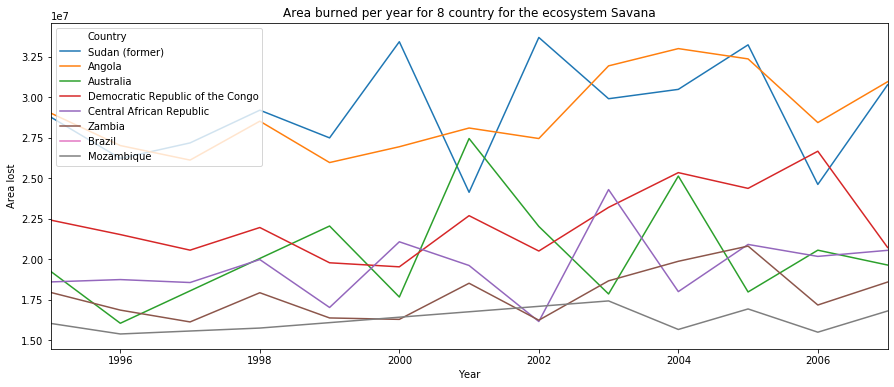

In [32]:
z= savannaCountry[savannaCountry['Ecosystem'] == 'Savanna']\
                        .groupby(['Year','Country'])['Area_loss']\
                        .sum()\
                        .sort_values(ascending = False)\
                        .to_frame()[:85]\
                        .reset_index()
plt.figure(figsize=(15,6))


ax = sns.lineplot(x="Year", y="Area_loss", hue="Country", data=z)

ax.set_title('Area burned per year for 8 country for the ecosystem Savana')
ax.set_xlim([1995,2007]);
plt.xlabel('Year');
plt.ylabel('Area lost');

We see on the plot that our values are widely distributed. Indeed here we plot the countries with the biggest loses but a lot of other countries have 0 loses or near 0 values. If needed, a log scale can be used to see them clearly.

#### Use of Savanna

The final dataframe: "savannaFinal" will be joined to the forest one to answer to the following question:
- What is the global evolution of the cultivated surface on a world scale from 1995 to 2007?
- What is the area lost of savanna, shrubland, grassland and forest per country per year?
- Do we see a correlation between the area lost by ecosystems and the area gain by agriculture?
- If there is a correlation between an increase in area cultivated and area lost from all the ecosystems, what would be approximatively the area lost because of the selected crops in particular?

<a id="forests"></a>
# Forests

In [33]:
forests = pd.read_csv(datapath + current_fao + "Emissions_Land_Use_Forest_Land_E_All_Data_(Norm).csv", sep=",", encoding="latin_1")         # Less forests
forests.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [34]:
forests

Country Code      Country  Item Code         Item  Element Code  \
0                 2  Afghanistan       6661       Forest          5110   
1                 2  Afghanistan       6661       Forest          5110   
2                 2  Afghanistan       6661       Forest          5110   
3                 2  Afghanistan       6661       Forest          5110   
4                 2  Afghanistan       6661       Forest          5110   
...             ...          ...        ...          ...           ...   
73062          5873         OECD       6749  Forest land         72172   
73063          5873         OECD       6749  Forest land         72172   
73064          5873         OECD       6749  Forest land         72172   
73065          5873         OECD       6749  Forest land         72172   
73066          5873         OECD       6749  Forest land         72172   

                                           Element  Year Code  Year  \
0                                             Area       1990  1990   
1                                             Area       1991  1991   
2                                             Area       1992  1992   
3                                             Area       1993  1993   
4                                             Area       1994  1994   
...                                            ...        ...   ...   
73062  Net emissions/removal (CO2eq) (Forest land)       2011  2011   
73063  Net emissions/removal (CO2eq) (Forest land)       2012  2012   
73064  Net emissions/removal (CO2eq) (Forest land)       2013  2013   
73065  Net emissions/removal (CO2eq) (Forest land)       2014  2014   
73066  Net emissions/removal (CO2eq) (Forest land)       2015  2015   

            Unit        Value Flag  
0        1000 Ha    1350.0000    F  
1        1000 Ha    1350.0000    F  
2        1000 Ha    1350.0000    F  
3        1000 Ha    1350.0000    F  
4        1000 Ha    1350.0000    F  
...          ...          ...  ...  
73062  Gigagrams -818448.2103    A  
73063  Gigagrams -818448.2103    A  
73064  Gigagrams -818448.2103    A  
73065  Gigagrams -818448.2103    A  
73066  Gigagrams -818448.2103    A  

[73067 rows x 11 columns]

#### Description :

As you can see above, this dataset contains the same columns as savanna.

It contains 73067 rows and it is registered by year for each Country, item and element from 1990 to 2015. 

In [35]:
forests.shape

(73067, 11)

#### Selection of useful data : 

In [36]:
print(pd.Series.unique(forests.Item))
print(pd.Series.unique(forests.Element))

['Forest' 'Net Forest conversion' 'Forest land']
['Area' 'Implied emission factor for CO2'
 'Net emissions/removals (CO2) (Forest land)'
 'Net emissions/removal (CO2eq) (Forest land)']


We see that we have three different possible items. For this project, we only care about the biomes that are destructed, therefore we only keep the item "Net Forest Conversion" which represent the area of deforestation (for agriculture, mines, urbanisation, ...). We also see that we have multiple possible elements. The area is the one of interest for us. 

In [37]:
forests = forests.query("Item == 'Net Forest conversion'")
forests = forests.query("Element == 'Area'")
forests.shape

(6817, 11)

As we can see, we only have 6817 rows left already. What about the Flag column now ?

In [38]:
print(pd.Series.unique(forests.Flag))

['Fc' 'A']


We have two kind of flags : 
- "Fc" which tells that the data is only calculated
- "A" which tells that the data is aggregated and may include official, semi-official estimated or calculated data

We don't really care how the data was collected. Therefore, we will remove this column. 

In [39]:
forests = forests.drop(columns="Flag")

Looking at the unit of the areas, we see that it is in 1000 Ha. To be consistent with the Savanna dataset, we need to convert the area into a unit of 1 Ha (and then remove the unit colum alltogether):

In [40]:
forests.Value = forests.Value*1000
forests = forests.drop(columns="Unit")

Then, we will also remove the column Element, since we our dataframe only contains area now. We will also remove code columns and do some renaming to be consistent with Savanna. Finally a rename "Net Forest Conversion" into "Forest" since it is clear from our project that we only consider lost areas:

In [41]:
forests = forests.drop(columns=["Item Code", "Element Code", "Year Code", "Element"])
forests = forests.rename(columns={"Item":"Ecosystem", "Value":"Area_loss"})
forests.Ecosystem = "Forest" 
# Based on results from other datasets, we only keep data between 1995 and 2007 :
forests = forests[forests.Year >= 1995]
forests = forests[forests.Year <= 2007]
forests

Country Code      Country Ecosystem  Year  Area_loss
109               2  Afghanistan    Forest  1995        0.0
110               2  Afghanistan    Forest  1996        0.0
111               2  Afghanistan    Forest  1997        0.0
112               2  Afghanistan    Forest  1998        0.0
113               2  Afghanistan    Forest  1999        0.0
...             ...          ...       ...   ...        ...
72924          5873         OECD    Forest  2003  1725477.4
72925          5873         OECD    Forest  2004  1725477.4
72926          5873         OECD    Forest  2005  1725477.4
72927          5873         OECD    Forest  2006  2187015.0
72928          5873         OECD    Forest  2007  2187015.0

[3429 rows x 5 columns]

In [42]:
forests.isna().drop_duplicates()

Country Code  Country  Ecosystem   Year  Area_loss
109         False    False      False  False      False

As we can see above, there are no na/Nan values inside this dataframe.

Now about the countries. Looking at the country code, it seems like there are 5873 different countries ? What about the actual countries : 

In [43]:
pd.Series.nunique(forests.Country)

267

There are only 272 country like elements, which makes more sense. let see the country code:

In [44]:
pd.Series.unique(forests["Country Code"])

array([   2,    3,    4,    5,    6,    7,  258,    8,    9,    1,   22,
         10,   11,   52,   12,   13,   16,   14,   57,  255,   15,   23,
         53,   17,   18,   19,   80,   20,   21,  239,   26,   27,  233,
         29,   35,  115,   32,   33,   36,   37,   39,  259,   40,  351,
         41,   44,   45,   46,   47,   48,  107,   98,   49,   50,  167,
        116,  250,   54,   72,   55,   56,   58,   59,   60,   61,  178,
         63,  238,   65,   64,   66,   67,   68,   69,   70,   74,   75,
         73,   79,   81,   82,   84,   85,   86,   87,   88,   89,   90,
        175,   91,   93,   95,   97,   99,  100,  101,  102,  103,  104,
        264,  105,  106,  109,  110,  112,  108,  114,   83,  118,  113,
        120,  119,  121,  122,  123,  124,  125,  126,  256,  129,  130,
        131,  132,  133,  134,  127,  135,  136,  137,  270,  138,  145,
        141,  273,  142,  143,  144,   28,  147,  148,  149,  150,  151,
        153,  156,  157,  158,  159,  160,  161,  1

We see that there is something special with the numbering of the country : Some numbers are not there (232 for example), but more importantly, the numbers jump to around 5'000. What data is contained whith these 5'000+ country codes? 

Apprently, these "countries" are in fact geographical and economical regions/continent. We will store them in different dataframes, as in Savanna, for later use : 

In [45]:
forestsCountry = forests[forests["Country Code"] < 5000].drop(columns="Country Code")
forestsRegion_eco = forests[forests["Country Code"] >= 5000]
forestsRegion = forestsRegion_eco[forestsRegion_eco["Country Code"] < 5700].drop(columns="Country Code")
forestsEconomical_segment = forestsRegion_eco[forestsRegion_eco["Country Code"] >= 5700].drop(columns="Country Code")
forests = forests.drop(columns="Country Code")

In [46]:
forestsCountry.head(5)

Country Ecosystem  Year  Area_loss
109  Afghanistan    Forest  1995        0.0
110  Afghanistan    Forest  1996        0.0
111  Afghanistan    Forest  1997        0.0
112  Afghanistan    Forest  1998        0.0
113  Afghanistan    Forest  1999        0.0

In [47]:
forestsRegion.head(5)

Country Ecosystem  Year   Area_loss
64510   World    Forest  1995  13029740.8
64511   World    Forest  1996  13029740.8
64512   World    Forest  1997  13029740.8
64513   World    Forest  1998  13029740.8
64514   World    Forest  1999  13029740.8

In [48]:
forestsEconomical_segment.head(5)

Country Ecosystem  Year  Area_loss
71044  European Union    Forest  1995   266140.1
71045  European Union    Forest  1996   266140.1
71046  European Union    Forest  1997   266140.1
71047  European Union    Forest  1998   266140.1
71048  European Union    Forest  1999   266140.1

#### Analysis of the desired value

In [49]:
forestsCountry["Area_loss"].describe()

count    2.948000e+03
mean     5.562358e+04
std      2.156696e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+01
75%      1.700000e+04
max      2.996800e+06
Name: Area_loss, dtype: float64

Nothing much is to be said on this datasets, as it is very similar to Savanna, only with different actual values. We will analyze more of it later when we work on the merged data and do the true work for milestone 3.

<a id="merge"></a>
# Biomes

#### Merge of all the Biomes Data Set

In this section we will merge all the final dataframe from Savanna, Forests and from the datascraping. From this we will get three dataframes, one for the seperation by countries, one for the region and one for the economic segments. These dataset will be refered to as `Biomes` in the section 7: "Data to answer the questions".

In [50]:
# First we add the forest ecosystem to the ones from savanna for the Country datasets
lossesCountry = savannaCountry.append(forestsCountry)
lossesCountry['Country']=lossesCountry['Country'].str.replace('Russian Federation', 'Russia', regex=False)
# lossMean take the mean loss overthe years per countries per biomes
lossMean = lossesCountry.groupby(['Country', 'Ecosystem']).Area_loss.agg(sum).reset_index()
lossMean['Area_loss']=lossMean['Area_loss'].div(len(np.unique(lossesCountry['Year'])))
# We add to this  the data from the scraping to get the total land area of each country
land_areas = country_areas[["Country", "Land"]]
biomesCountry = lossesCountry.merge(land_areas, on='Country')
biomesMean = lossMean.merge(land_areas, on='Country')
# Compute the percentage:
biomesCountry['Area_loss_percentage'] = biomesCountry['Area_loss']/biomesCountry['Land'].astype('int')*100
biomesMean['Area_loss_percentage'] = biomesMean['Area_loss']/biomesMean['Land'].astype('int')*100
#'Area_loss_number' is a column that will just help to plot the data on a logscale:
biomesCountry['Area_loss_number'] = (biomesCountry['Area_loss_percentage']*1e8).astype('float')
biomesMean['Area_loss_number'] = (biomesMean['Area_loss_percentage']*1e8).astype('float')
biomesMean.head()

Country  Ecosystem     Area_loss        Land  Area_loss_percentage  \
0  Afghanistan     Forest      0.000000  6.5223e+07              0.000000   
1  Afghanistan  Grassland   3162.142046  6.5223e+07              0.004848   
2  Afghanistan    Savanna    162.069169  6.5223e+07              0.000248   
3  Afghanistan  Shrubland  27303.634569  6.5223e+07              0.041862   
4      Albania     Forest   1087.692308  2.7398e+06              0.039700   

   Area_loss_number  
0      0.000000e+00  
1      4.848201e+05  
2      2.484847e+04  
3      4.186197e+06  
4      3.969970e+06

In [51]:
# The same is done for the region but without the total area
biomesRegion = forestsRegion.append(savannaRegion)
biomesRegion.head()

Country Ecosystem  Year   Area_loss
64510   World    Forest  1995  13029740.8
64511   World    Forest  1996  13029740.8
64512   World    Forest  1997  13029740.8
64513   World    Forest  1998  13029740.8
64514   World    Forest  1999  13029740.8

In [52]:
#The same is done for the economic segment:
biomesEconomical_segment = forestsEconomical_segment.append(savannaEconomical_segment)
biomesEconomical_segment.head()

Country Ecosystem  Year  Area_loss
71044  European Union    Forest  1995   266140.1
71045  European Union    Forest  1996   266140.1
71046  European Union    Forest  1997   266140.1
71047  European Union    Forest  1998   266140.1
71048  European Union    Forest  1999   266140.1

<a id="crops"></a>
# Crops

The dataset `Crops` give us informations about distribution of crops in different areas over the years. We investigate this data set more in details in the file `Crops.ipynb` and will only present here the conclusive data sets and analysis. 

In [53]:
crops.dtypes

country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object

In [54]:
crops.shape

(2255349, 8)

In [55]:
crops.head()

country_or_area element_code         element    year unit    value  \
0      Americas +           31  Area Harvested  2007.0   Ha  49404.0   
1      Americas +           31  Area Harvested  2006.0   Ha  49404.0   
2      Americas +           31  Area Harvested  2005.0   Ha  49404.0   
3      Americas +           31  Area Harvested  2004.0   Ha  49113.0   
4      Americas +           31  Area Harvested  2003.0   Ha  48559.0   

  value_footnotes          category  
0              A   agave_fibres_nes  
1              A   agave_fibres_nes  
2              A   agave_fibres_nes  
3              A   agave_fibres_nes  
4              A   agave_fibres_nes

In [56]:
# Save a dataframe needed for Best crop for each country
crops_A=crops

In [57]:
#rename Russia to be consistant with final maps 
crops['country_or_area']=crops['country_or_area'].str.replace('Russian Federation', 'Russia', regex=False)

## Discussion on the Investigation

From investigation following, we describe each features of the dataFrame: \
   * `country_or_area`: area where the product is cultivated. From the investigation, we observe different regroupments for those areas. They can correspond to countries, regions such as continents or even the world or economical regroupments such as `Low Income Food Deficit Countries`. 
   * `element`: gives us a number of different informations about the adding of the crops. We have lot of information on PIN, which is a production index qualifying the land needed per unit of crop production in 1961.We also have informations on  Seeds and Yields. IN order to answer our specific question, we will only keep `Area Harvested` and `ProductionQuantity`, respectively in Hectars and Tonnes as it can be seen in the feature `unit`. From now on, the data frames will be generated for both elements. 
   * `year`: the years are from 1961 to 2007. As the datasets `Savanna` and `Forests` are restricted to 1990, we choose to start at 1990 too in order to be able to conduct correlations. From the investigation, we can see that th enumber of data is uneven through time with a lot less data in the older years. 
   * `value`: feature of biggest interest as it will give us the corresponding value. Units are given in the `unit` feature and correspond to the information said in `element`.
   * `category`: the sort of product that is concerned by the informations. From the investigation, we see that there are also regroupments. Hence, we can find products by themselves such as `Bananas` or groups of products such as `cereals_total`. 
   
We decided to present the results for the products in two parts. First, we will observe the phenomena globally, by countries and using all the products all together. in the second part, we will work on only 5 specific food products in order to have a specific idea of the phenomena. We chose `Bananas`, `palm_oil`, `sojabean`, `banana`, `wheat`, `rice` because we though that they are a good compromise between the top ranked products for productiona and area harvested and top ranked products for inport and export. We want to be able to see interesting and different results, that is why if we realize that products in the list present similar results, we let us the possibility to take another one. 
    
Let's start the investigation. We will now investigate each features in order to have an idea of what kind of information we have.

## Investigation of Crops
### Element Code 
Let's start the investigation by understanding what categories of inforamtions we have.  


In [58]:
crops.groupby('element_code').count()

country_or_area  element  \
element_code                                                                   
111                                                          204568   204568   
152                                                            9399     9399   
154                                                            9399     9399   
31                                                           671153   671153   
41                                                           631078   631078   
432                                                            9145     9145   
434                                                            9145     9145   
436                                                            9145     9145   
438                                                            9145     9145   
51                                                           692208   692208   
Calculated Data                                                 157        0   
FAO Estimate                                                    158        0   
Footnote                                                        172        0   
May include official, semi-official or estimate...              172        0   
Not reported by country                                         154        0   
Unofficial figure                                               151        0   

                                                      year    unit   value  \
element_code                                                                 
111                                                 204568  204568  204568   
152                                                   9399    9399    9399   
154                                                   9399    9399    9399   
31                                                  671153  671153  671153   
41                                                  631078  631078  631078   
432                                                   9145    9145    9145   
434                                                   9145    9145    9145   
436                                                   9145    9145    9145   
438                                                   9145    9145    9145   
51                                                  692208  692208  692208   
Calculated Data                                          0       0       0   
FAO Estimate                                             0       0       0   
Footnote                                                 0       0       0   
May include official, semi-official or estimate...       0       0       0   
Not reported by country                                  0       0       0   
Unofficial figure                                        0       0       0   

                                                    value_footnotes  category  
element_code                                                                   
111                                                          188064    204568  
152                                                            9399      9399  
154                                                            9399      9399  
31                                                           473111    671153  
41                                                           615683    631078  
432                                                            9145      9145  
434                                                            9145      9145  
436                                                            9145      9145  
438                                                            9145      9145  
51                                                           443731    692208  
Calculated Data                                                   0       157  
FAO Estimate                                                      0       158  
Footnote                                                          0       172  
May in

We can see that for elements that are not numbers, the data seem to be missing.

In [59]:
crops.loc[crops.element_code == 'FAO Estimate']

country_or_area  element_code element  year unit  value  \
2401                 F   FAO Estimate     NaN   NaN  NaN    NaN   
11396                F   FAO Estimate     NaN   NaN  NaN    NaN   
20081                F   FAO Estimate     NaN   NaN  NaN    NaN   
34985                F   FAO Estimate     NaN   NaN  NaN    NaN   
46753                F   FAO Estimate     NaN   NaN  NaN    NaN   
...                 ...           ...     ...   ...  ...    ...   
2194131              F   FAO Estimate     NaN   NaN  NaN    NaN   
2213221              F   FAO Estimate     NaN   NaN  NaN    NaN   
2239308              F   FAO Estimate     NaN   NaN  NaN    NaN   
2252286              F   FAO Estimate     NaN   NaN  NaN    NaN   
2255347              F   FAO Estimate     NaN   NaN  NaN    NaN   

        value_footnotes                    category  
2401                NaN            agave_fibres_nes  
11396               NaN          almonds_with_shell  
20081               NaN  anise_badian_fennel_corian  
34985               NaN                      apples  
46753               NaN                    apricots  
...                 ...                         ...  
2194131             NaN          walnuts_with_shell  
2213221             NaN                 watermelons  
2239308             NaN                       wheat  
2252286             NaN                        yams  
2255347             NaN              yautia_cocoyam  

[158 rows x 8 columns]

It seems to be because for those categories of elements, the values are NaN. We won't be able to fill them so we remove them. 

### Value Footnotes
From the `FAO website`, we see that it corresponds to how the data were collected. The information won't help us for our questions so we remove the feature.

In [60]:
crops.groupby('value_footnotes').count()

country_or_area  element_code  element    year    unit  \
value_footnotes                                                           
A                         974473        974473   974473  974473  974473   
F                         264501        264501   264501  264501  264501   
Fc                        386744        386744   386744  386744  386744   
NR                        150249        150249   150249  150249  150249   

                  value  category  
value_footnotes                    
A                974473    974473  
F                264501    264501  
Fc               386744    386744  
NR               150249    150249

In [61]:
#remove value_footnotes and element_code
crops = crops.drop(columns=['value_footnotes', 'element_code'])

In [62]:
# remove missing values
crops = crops.dropna()
crops.shape

(2254385, 6)

In [63]:
crops.sort_values('value', ascending=False)

country_or_area                             element  \
455824                          World +                 Production Quantity   
455827                          World +                 Production Quantity   
455826                          World +                 Production Quantity   
455825                          World +                 Production Quantity   
363756                          World +                 Production Quantity   
...                                 ...                                 ...   
1329116                          Belize                               Yield   
1329115                          Belize                               Yield   
1329114                          Belize                               Yield   
1329113                          Belize                               Yield   
426898   Occupied Palestinian Territory  Net Production 1999-2001 (1000 I$)   

           year         unit         value                   category  
455824   2007.0       tonnes  2.351396e+09              cereals_total  
455827   2004.0       tonnes  2.280834e+09              cereals_total  
455826   2005.0       tonnes  2.267177e+09              cereals_total  
455825   2006.0       tonnes  2.239236e+09              cereals_total  
363756   2007.0       tonnes  2.131753e+09    cereals_rice_milled_eqv  
...         ...          ...           ...                        ...  
1329116  1984.0        Hg/Ha  0.000000e+00  onions_inc_shallots_green  
1329115  1985.0        Hg/Ha  0.000000e+00  onions_inc_shallots_green  
1329114  1986.0        Hg/Ha  0.000000e+00  onions_inc_shallots_green  
1329113  1987.0        Hg/Ha  0.000000e+00  onions_inc_shallots_green  
426898   1979.0  1000 Int. $  0.000000e+00              cereals_total  

[2254385 rows x 6 columns]

We can still see a lot of 0 values. We will keep them for now.\
### Element

Now let's observe a little bit more what kind of data are given. 

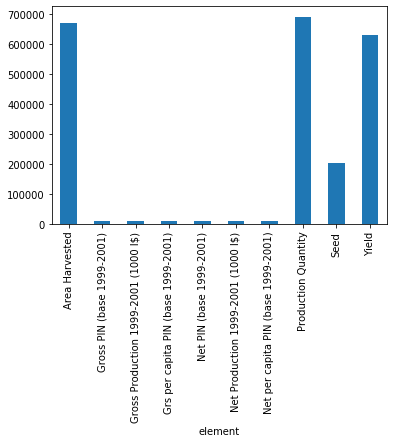

In [64]:
elements = crops.copy()
elements = elements.groupby('element').count()
elements['value'].plot(kind='bar')

In [65]:
#look at the order of values for the different elements 
#here look at 'Gross PIN (base 1999-2001)''
crops.loc[crops.element == 'Gross PIN (base 1999-2001)'].head()

country_or_area                     element    year    unit  value  \
364728     Afghanistan  Gross PIN (base 1999-2001)  2007.0  Int. $  235.0   
364729     Afghanistan  Gross PIN (base 1999-2001)  2006.0  Int. $  188.0   
364730     Afghanistan  Gross PIN (base 1999-2001)  2005.0  Int. $  221.0   
364731     Afghanistan  Gross PIN (base 1999-2001)  2004.0  Int. $  144.0   
364732     Afghanistan  Gross PIN (base 1999-2001)  2003.0  Int. $  180.0   

             category  
364728  cereals_total  
364729  cereals_total  
364730  cereals_total  
364731  cereals_total  
364732  cereals_total

In [66]:
crops.loc[crops.element == 'Net Production 1999-2001 (1000 I$)'].head()

country_or_area                             element    year  \
364587     Afghanistan  Net Production 1999-2001 (1000 I$)  2007.0   
364588     Afghanistan  Net Production 1999-2001 (1000 I$)  2006.0   
364589     Afghanistan  Net Production 1999-2001 (1000 I$)  2005.0   
364590     Afghanistan  Net Production 1999-2001 (1000 I$)  2004.0   
364591     Afghanistan  Net Production 1999-2001 (1000 I$)  2003.0   

               unit     value       category  
364587  1000 Int. $  861765.0  cereals_total  
364588  1000 Int. $  679843.0  cereals_total  
364589  1000 Int. $  803456.0  cereals_total  
364590  1000 Int. $  511338.0  cereals_total  
364591  1000 Int. $  652969.0  cereals_total

PIN: production index = land needed per unit of crop production in 1961 (in 1961 = 1): it won't interest us because it will be hard to put it in correlation to the other data sets. 

Gross PIN (base 1999-2001): not interessted \
Gross Production 1999-2001 (1000 dollars): not interested in looking at monetary values \
Grs per capita PIN (base 1999-2001): not interested in PIN \
Net PIN (base 1999-2001): not interested in PIN \
Net per capita PIN (base 1999-2001): not interested in PIN \
Net Production 1999-2001 (1000 dollars): not interested in looking at monetary values

We won't be interested by all of that. We can also remove `Seed` and `Yield` \
Hence we only keep `Area Harvested` and `Production Quantity` that we separate in 2 tables.

In [67]:
# create one df for the elements we are not interested, another for the 2 interesting elements
crops_no_interest = crops.loc[~(crops.element=='Area Harvested')\
                                     & ~(crops.element=='Production Quantity')] #every elements except the 2 of interest 
crops_interest = crops.drop(crops_no_interest.index, axis=0)

### Unit 

Now we only have 2 elements. We want to check that they indeed don't have the same units and tha twe need to separate them in 2 different df.

In [68]:
crops_interest[(crops_interest.unit=='Ha') & (crops_interest.element=='Production Quantity')]

Empty DataFrame
Columns: [country_or_area, element, year, unit, value, category]
Index: []

As they don't have the same unit, we need to separate them in 2 different tables.\
Now we can look at the other informations. We will continue the analysis by creating both tables every time as we will need both depending on the question. Nevertheless, we will print the df of only the `Area Harvested` informations for more readability. 


In [69]:
crops_area = crops_interest[crops_interest.element=='Area Harvested'] #in Ha : area added 
crops_prod = crops_interest[crops_interest.element=='Production Quantity'] #in tonnes : production

### Year

Last thing to study before looking at the informations about the products by themselves is the repartition of data over the years. 

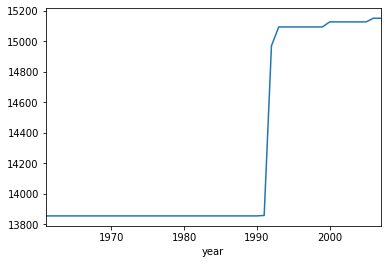

In [70]:
year_area = crops_area.copy()
year_area.groupby('year')['value'].count().plot()

One can see that the number of data over time is very different from 1961 to 2007. An interesting point could be to know if it is due to the development of data collection in the last years or if the difference of entries is really due to the difference of expansion of agriculture. 

### Country or Area 

We need to have both data frame. 

In [71]:
regions_prod = crops_prod.copy()
regions_area = crops_area.copy()

#area harvested for each country/region
regions_area.groupby('country_or_area')["value"].sum().sort_values(ascending=False).to_frame()

value
country_or_area                                  
World +                              1.599868e+11
Low Income Food Deficit Countries +  7.665792e+10
Asia +                               6.836644e+10
Europe +                             3.424290e+10
Americas +                           3.374058e+10
...                                           ...
US Virgin Islands                    1.060000e+04
Faroe Islands                        9.732000e+03
Cayman Islands                       8.126000e+03
British Virgin Islands               3.590000e+03
Saint Pierre and Miquelon            1.520000e+02

[251 rows x 1 columns]

We can see that the areas with the most entries of values consists in regions of the world such as continents or `Low Income Deficit Countries` which corresponds to economical regions, all ending with a `+`. As they regroup a lot of countries, they are not at the same scale as individual countries and we can separate the 3 categories (individual countries vs. areas/regions vs. economical regions).

##### Useful data frames

In [72]:
#specific global areas (regions or economical areas all finish by '+'

#create dataframe for all non-countries areas
crops_regions_area = regions_area[[name.endswith('+') for name in regions_area.country_or_area]]
crops_regions_prod = regions_prod[[name.endswith('+') for name in regions_prod.country_or_area]]

#dataframes for countries
crops_countries_area = regions_area.drop(crops_regions_area.index, axis=0)
crops_countries_prod = regions_prod.drop(crops_regions_prod.index, axis=0)

#list of the economical regions 
economical_segments = ['Least Developed Countries +', 'LandLocked developing countries +',
       'Small Island Developing States +', 'Low Income Food Deficit Countries +', 'Net Food Importing Developing Countries +']

#dataframes for economical areas
crops_eco_area = regions_area.loc[regions_area['country_or_area'].isin(economical_segments)]
crops_eco_prod = regions_prod.loc[regions_prod['country_or_area'].isin(economical_segments)]

#dataframes for regional areas
crops_regions_area = crops_regions_area.loc[~regions_area['country_or_area'].isin(economical_segments)]
crops_regions_prod = crops_regions_prod.loc[~regions_prod['country_or_area'].isin(economical_segments)]

##### Displaying

In [73]:
crops_countries_area

country_or_area         element    year unit  \
564                               Colombia  Area Harvested  2007.0   Ha   
565                               Colombia  Area Harvested  2006.0   Ha   
566                               Colombia  Area Harvested  2005.0   Ha   
567                               Colombia  Area Harvested  2004.0   Ha   
568                               Colombia  Area Harvested  2003.0   Ha   
...                                    ...             ...     ...  ...   
2255056  Venezuela, Bolivarian Republic of  Area Harvested  1965.0   Ha   
2255057  Venezuela, Bolivarian Republic of  Area Harvested  1964.0   Ha   
2255058  Venezuela, Bolivarian Republic of  Area Harvested  1963.0   Ha   
2255059  Venezuela, Bolivarian Republic of  Area Harvested  1962.0   Ha   
2255060  Venezuela, Bolivarian Republic of  Area Harvested  1961.0   Ha   

           value          category  
564      17500.0  agave_fibres_nes  
565      17500.0  agave_fibres_nes  
566      17500.0  agave_fibres_nes  
567      17294.0  agave_fibres_nes  
568      17094.0  agave_fibres_nes  
...          ...               ...  
2255056  11307.0    yautia_cocoyam  
2255057  11318.0    yautia_cocoyam  
2255058  11328.0    yautia_cocoyam  
2255059  11338.0    yautia_cocoyam  
2255060  11348.0    yautia_cocoyam  

[483153 rows x 6 columns]

In [74]:
#display area harvested by economic areas
crops_eco_area.groupby('country_or_area')["value"].sum().sort_values(ascending=False).to_frame()

value
country_or_area                                        
Low Income Food Deficit Countries +        7.665792e+10
Net Food Importing Developing Countries +  2.221224e+10
Least Developed Countries +                1.568426e+10
LandLocked developing countries +          8.058806e+09
Small Island Developing States +           6.466597e+08

In [75]:
#display area harvested by regional areas
crops_regions_area.groupby('country_or_area')["value"].sum().sort_values(ascending=False).to_frame()

value
country_or_area                          
World +                      1.599868e+11
Asia +                       6.836644e+10
Europe +                     3.424290e+10
Americas +                   3.374058e+10
Southern Asia +              3.085033e+10
Eastern Europe +             2.396467e+10
Eastern Asia +               2.206147e+10
Africa +                     2.097670e+10
Northern America +           1.939848e+10
European Union +             1.358359e+10
South America +              1.099009e+10
South-Eastern Asia +         9.929384e+09
Western Africa +             8.357869e+09
Eastern Africa +             5.520895e+09
Southern Europe +            4.712397e+09
Western Asia +               4.338389e+09
Northern Africa +            3.891611e+09
Western Europe +             3.812784e+09
Central America +            2.940681e+09
Oceania +                    2.660119e+09
Australia and New Zealand +  2.532888e+09
Middle Africa +              1.807756e+09
Northern Europe +            1.753050e+09
Southern Africa +            1.398568e+09
Central Asia +               1.186882e+09
Caribbean +                  4.113290e+08
Melanesia +                  1.030653e+08
Polynesia +                  1.480457e+07
Micronesia +                 9.360418e+06

Even now we can see that some reginal areas are redundant, for example, `Europe` is counted by itself and separated in `Southern Europe`, `Northern Europe`, `Eastern Europe` and `Western Europe`. That explains why the value for `World` is different from the sum of all the rest. \
It is interesting to see that `Low Income Food Deficit Countries` have more areas harvested than the entire `Asia`. We will analyse that further in Milestone 3. 

In [76]:
#display area harvested per countries  
crops_countries_area.groupby('country_or_area')["value"].sum().sort_values(ascending=False).to_frame().head(10)

value
country_or_area                       
India                     2.391471e+10
China                     2.069723e+10
China, mainland           2.054710e+10
United States of America  1.569625e+10
USSR                      1.495057e+10
Brazil                    6.147899e+09
Nigeria                   4.088043e+09
Canada                    3.702207e+09
Indonesia                 3.110258e+09
Russia                    2.978692e+09

There are 217 countries listed here. Knowing that there are as of today 195 countries in the world, we will need to consider that over time some countries disappeared, such as `USSR` or that countries are counted twice such as `China` and `China, mainland`.

### Categories of products

Now we are gonna investigate the products by themselves. \
Let's just try to observe results for countries individually as the results would be similar for bigger areas. 

In [77]:
category_area = crops_countries_area.copy()
category_prod = crops_countries_prod.copy()
cat_prod_regions = crops_regions_prod.copy()

#area harvested for each products for all countries
category_area.groupby('category')["value"].sum().sort_values(ascending=False).to_frame().head(15)

value
category                             
cereals_total            3.679708e+10
cereals_rice_milled_eqv  3.679708e+10
coarse_grain_total       1.699700e+10
wheat                    1.165933e+10
oilcrops_primary         9.207386e+09
oilcakes_equivalent      8.815416e+09
rice_paddy               8.140748e+09
maize                    6.927290e+09
pulses_total             3.387550e+09
barley                   3.302561e+09
soybeans                 2.838546e+09
roots_and_tubers_total   2.757671e+09
sorghum                  2.300379e+09
fibre_crops_primary      2.079049e+09
millet                   2.007758e+09

Here, again, we can see some categorization such as `_total` or `_eqv` that we need to put in another dataframe in order to be able to compare the different products individually on the same scale. 170 different categories of aliments are harvested in total (based on the size of the df). 

##### Useful data frames 

In [78]:
crops_indiv_area = category_area.copy()
crops_indiv_prod = category_prod.copy()
crops_indiv_prod_regions = cat_prod_regions.copy()

#df with categories of products 
crops_totals_area = crops_indiv_area[[name.endswith('_total') | name.endswith('_eqv') \
                                      | name.endswith('_equivalent') | name.endswith('_primary') \
                                      for name in crops_indiv_area['category']]]
crops_totals_prod = crops_indiv_prod[[name.endswith('_total') | name.endswith('_eqv') \
                                      | name.endswith('_equivalent') | name.endswith('_primary') \
                                      for name in crops_indiv_prod['category']]]

crops_totals_prod_regions = crops_indiv_prod_regions[[name.endswith('_total') | name.endswith('_eqv') \
                                      | name.endswith('_equivalent') | name.endswith('_primary') \
                                      for name in crops_indiv_prod_regions['category']]]

#df with only individual products 
crops_indiv_area = crops_indiv_area.drop(crops_totals_area.index, axis=0)
crops_indiv_prod = crops_indiv_prod.drop(crops_totals_prod.index, axis=0)
crops_indiv_prod_regions = crops_indiv_prod_regions.drop(crops_totals_prod_regions.index, axis=0)

##### Displaying 

In [79]:
crops_totals_area.groupby("category")["value"].sum().sort_values(ascending=False).to_frame().head(10)

value
category                             
cereals_total            3.679708e+10
cereals_rice_milled_eqv  3.679708e+10
coarse_grain_total       1.699700e+10
oilcrops_primary         9.207386e+09
oilcakes_equivalent      8.815416e+09
pulses_total             3.387550e+09
roots_and_tubers_total   2.757671e+09
fibre_crops_primary      2.079049e+09
fruit_excl_melons_total  1.973247e+09
vegetables_melons_total  1.883321e+09

(1995, 2007)

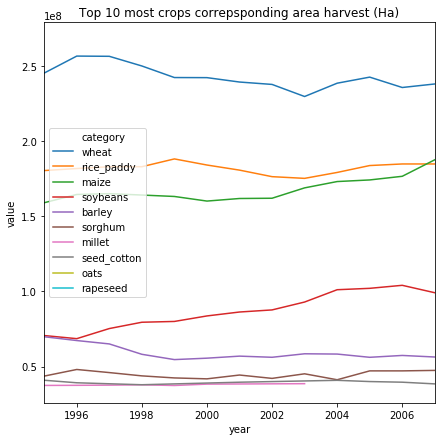

In [80]:
x = crops_indiv_area.groupby(['year','category'])['value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:350]\
                                                    .reset_index()
plt.figure(figsize=(7,7))


ax = sns.lineplot(x="year", y="value", hue="category",
                   data=x)

ax.set_title('Top 10 most crops correpsponding area harvest (Ha)')
ax.set_xlim([1995,2007])

In [81]:
crops_indiv_prod.groupby("category")["value"].sum().sort_values(ascending=False).to_frame().head(10)

value
category                          
sugar_cane            4.469464e+10
rice_paddy            2.768484e+10
wheat                 2.492530e+10
maize                 2.424903e+10
potatoes              1.514378e+10
sugar_beet            1.228800e+10
sweet_potatoes        1.092999e+10
vegetables_fresh_nes  8.518075e+09
barley                6.832736e+09
cassava               6.525130e+09

(1995, 2007)

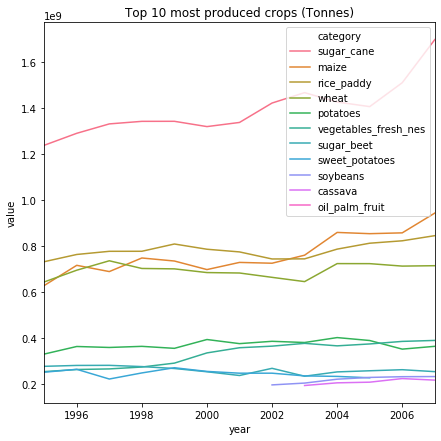

In [82]:
x = crops_indiv_prod.groupby(['year','category'])['value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:350]\
                                                    .reset_index()
plt.figure(figsize=(7,7))


ax = sns.lineplot(x="year", y="value", hue="category",
                   data=x)

ax.set_title('Top 10 most produced crops (Tonnes)')
ax.set_xlim([1995,2007])

We see a lot of similarities between top ranked products for `Area Harvested` and `Production Quantities`. We still see some differences that will be interested to study and to put in relationship with the other datasets.

We can also see that some data are missing in certain years for some products.

<a id="livestock"></a>
# Livestock

In [83]:
livestock.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [84]:
livestock.head(5)

Area Code         Area  Item Code             Item  Element Code  \
0          2  Afghanistan        231  Almonds shelled          5910   
1          2  Afghanistan        231  Almonds shelled          5910   
2          2  Afghanistan        231  Almonds shelled          5910   
3          2  Afghanistan        231  Almonds shelled          5910   
4          2  Afghanistan        231  Almonds shelled          5910   

           Element  Year Code  Year    Unit  Value Flag  
0  Export Quantity       1961  1961  tonnes    0.0  NaN  
1  Export Quantity       1962  1962  tonnes    0.0  NaN  
2  Export Quantity       1963  1963  tonnes    0.0  NaN  
3  Export Quantity       1964  1964  tonnes    0.0  NaN  
4  Export Quantity       1965  1965  tonnes    0.0  NaN

In [85]:
livestock['Area']=livestock['Area'].str.replace('Russian Federation', 'Russia', regex=False)

In [86]:
print("total null values: ", livestock.isna().sum().sum())

total null values:  8408201


It seems like a lot of data is missing in Value and Flag sections 
It corresponds to lack of information especially for the value section in which we are the most interested. Lets drop the rows with Value column  missing 



In [87]:
print("old dataframe shape: ",livestock.shape)
clean_live_stocks = livestock.dropna(axis=0, how='any', subset=['Value'])
print( "new dataframe shape: ", clean_live_stocks.shape)


old dataframe shape:  (14566119, 11)
new dataframe shape:  (11748779, 11)


We keep NAN flag for the moment as we don't know how to deal with it \


### Area Investigation

Counting the number of element per features gives additional information compared to unique feature display when it comes to investigation.


In [88]:
intervals = clean_live_stocks.groupby('Area')["Area Code"].count().to_frame().sort_values(by=['Area Code'],ascending=False) 
intervals.head()


Area Code
Area                                              
World                                        95150
Asia                                         91250
Europe                                       88384
Net Food Importing Developing Countries      88304
European Union                               88189

It seems that not only data contains countries stocks data, but regions, continents and other segments. 

Let us group each area by scale 



In [89]:
regions = ['EU(12)ex.int',
       'EU(15)ex.int', 'EU(25)ex.int', 'EU(27)ex.int',
       'European Union (exc intra-trade)', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia & New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia','World']

economical_segments = ['Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries','European Union']

not_countries = regions+economical_segments

countries_live_stock = clean_live_stocks[~clean_live_stocks['Area'].isin(not_countries)].copy()





In [90]:
intervals = countries_live_stock.groupby('Area')["Area Code"].count().to_frame().sort_values(by=['Area Code'],ascending=False) 
intervals.head()

Area Code
Area                     
United Kingdom      82610
Germany             82484
France              81997
Italy               81559
Spain               81264

More developed countries appear more in trade exchanges as other ones less globalized display fewer exchanges. This is consistent with our observations

## Item Investigation

In [91]:
intervals = countries_live_stock.groupby('Item')["Item Code"].count().to_frame().sort_values(by=['Item Code'],ascending=False) 
intervals.head()

Item Code
Item                           
Sugar and Honey           37635
Cereals                   37609
Animal Vegetable Oil      37536
Total Meat                37485
Beverages                 37471

Lots of items do not correspond to land crops nor food, we should get rid of them and only keep must exchanged landcrops 

FAO crops classifications : 

1 - CEREALS AND CEREAL PRODUCTS\
2 - ROOTS AND TUBERS AND DERIVED PRODUCTS\
3 - SUGAR CROPS AND SWEETENERS AND DERIVED PRODUCTS\
4 - PULSES AND DERIVED PRODUCTS\
5 - NUTS AND DERIVED PRODUCTS\
6 - OIL-BEARING CROPS AND DERIVED PRODUCTS\
7 - VEGETABLES AND DERIVED PRODUCTS\
8 - FRUITS AND DERIVED PRODUCTS\
9 - FIBRES OF VEGETAL AND ANIMAL ORIGIN\
10 - SPICES\
11 - FODDER CROPS AND PRODUCTS\
12 - STIMULANT CROPS AND DERIVED PRODUCTS\
13 - TOBACCO AND RUBBER AND OTHER CROPS\
14 - VEGETABLE AND ANIMAL OILS AND FATS\
15 - BEVERAGES\
16 - LIVESTOCK\
17 - PRODUCTS FROM SLAUGHTERED ANIMALS\
18 - PRODUCTS FROM LIVE ANIMALS\
19 - HIDES AND SKINS\
20 - OTHER LIVESTOCK PRODUCTS\
21 - PESTICIDES\
22 - FERTILIZERS\
23 - MACHINERY




In [92]:
#Processing FAO stat dataset to make it merge compliant with livestock dataset
item_codes=item_codes.drop(columns=['Scientific Name','Common Name','Definition'])
item_codes=item_codes.dropna()
item_codes['FCL Item code']=item_codes['FCL Item code'].apply(lambda x : int(x))
item_codes=item_codes.rename(columns={'FCL Item code':'Item Code','FCL Title':'Item'})




In [93]:
merged_live_crops = pd.merge(clean_live_stocks,item_codes,how='left',on='Item Code')
merged_live_crops=merged_live_crops.drop(columns="Item_y")
merged_live_crops=merged_live_crops.rename(columns={'Item_x':'Item'})
merged_live_crops.head()



Area Code         Area  Item Code             Item  Element Code  \
0          2  Afghanistan        231  Almonds shelled          5910   
1          2  Afghanistan        231  Almonds shelled          5910   
2          2  Afghanistan        231  Almonds shelled          5910   
3          2  Afghanistan        231  Almonds shelled          5910   
4          2  Afghanistan        231  Almonds shelled          5910   

           Element  Year Code  Year    Unit  Value Flag  \
0  Export Quantity       1961  1961  tonnes    0.0  NaN   
1  Export Quantity       1962  1962  tonnes    0.0  NaN   
2  Export Quantity       1963  1963  tonnes    0.0  NaN   
3  Export Quantity       1964  1964  tonnes    0.0  NaN   
4  Export Quantity       1965  1965  tonnes    0.0  NaN   

                           Group  
0  5 - NUTS AND DERIVED PRODUCTS  
1  5 - NUTS AND DERIVED PRODUCTS  
2  5 - NUTS AND DERIVED PRODUCTS  
3  5 - NUTS AND DERIVED PRODUCTS  
4  5 - NUTS AND DERIVED PRODUCTS

In [94]:
merged_live_crops.Group.unique()

array(['5 - NUTS AND DERIVED PRODUCTS', '10 - SPICES',
       '8 - FRUITS AND DERIVED PRODUCTS',
       '1 - CEREALS AND CEREAL PRODUCTS', '15 - BEVERAGES',
       '18 - PRODUCTS FROM LIVE ANIMALS',
       '11 - FODDER CROPS AND PRODUCTS',
       '12 - STIMULANT CROPS AND DERIVED PRODUCTS',
       '13 - TOBACCO AND RUBBER AND OTHER CROPS',
       '6 - OIL-BEARING CROPS AND DERIVED PRODUCTS',
       '9 - FIBRES OF VEGETAL AND ANIMAL ORIGIN',
       '14 - VEGETABLE AND ANIMAL OILS AND FATS', '19 - HIDES AND SKINS',
       '3 - SUGAR CROPS AND SWEETENERS AND DERIVED PRODUCTS',
       '17 - PRODUCTS FROM SLAUGHTERED ANIMALS',
       '7 - VEGETABLES AND DERIVED PRODUCTS',
       '2 - ROOTS AND TUBERS AND DERIVED PRODUCTS', nan,
       '4 - PULSES AND DERIVED PRODUCTS', '20 - OTHER LIVESTOCK PRODUCTS'],
      dtype=object)

In [95]:
merged_live_crops.dtypes



Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
Group            object
dtype: object

In [96]:
merged_live_crops.Group.unique()

array(['5 - NUTS AND DERIVED PRODUCTS', '10 - SPICES',
       '8 - FRUITS AND DERIVED PRODUCTS',
       '1 - CEREALS AND CEREAL PRODUCTS', '15 - BEVERAGES',
       '18 - PRODUCTS FROM LIVE ANIMALS',
       '11 - FODDER CROPS AND PRODUCTS',
       '12 - STIMULANT CROPS AND DERIVED PRODUCTS',
       '13 - TOBACCO AND RUBBER AND OTHER CROPS',
       '6 - OIL-BEARING CROPS AND DERIVED PRODUCTS',
       '9 - FIBRES OF VEGETAL AND ANIMAL ORIGIN',
       '14 - VEGETABLE AND ANIMAL OILS AND FATS', '19 - HIDES AND SKINS',
       '3 - SUGAR CROPS AND SWEETENERS AND DERIVED PRODUCTS',
       '17 - PRODUCTS FROM SLAUGHTERED ANIMALS',
       '7 - VEGETABLES AND DERIVED PRODUCTS',
       '2 - ROOTS AND TUBERS AND DERIVED PRODUCTS', nan,
       '4 - PULSES AND DERIVED PRODUCTS', '20 - OTHER LIVESTOCK PRODUCTS'],
      dtype=object)

Adding this new column Group to our DataFrame allows us to chose which crops we want to keep 


Let us define the group we are interested in, for instance:\
•VEGETABLES AND DERIVED PRODUCTS\
•FRUITS AND DERIVED PRODUCTS\
•OIL-BEARING CROPS AND DERIVED PRODUCTS\
•ROOTS AND TUBERS AND DERIVED PRODUCTS\
•CEREALS AND CEREAL PRODUCTS\
•FODDER CROPS AND PRODUCTS\
•VEGETABLE AND ANIMAL OILS AND FATS


In [126]:
kept_crops = ['8 - FRUITS AND DERIVED PRODUCTS','7 - VEGETABLES AND DERIVED PRODUCTS','6 - OIL-BEARING CROPS AND DERIVED PRODUCTS',\
              '2 - ROOTS AND TUBERS AND DERIVED PRODUCTS','1 - CEREALS AND CEREAL PRODUCTS','11 - FODDER CROPS AND PRODUCTS','14 - VEGETABLE AND ANIMAL OILS AND FATS']

# Create  multi scale data frames with only the selected crops 
countries_live_stock = merged_live_crops[~merged_live_crops['Area'].isin(not_countries)].copy()
economical_segments = merged_live_crops[merged_live_crops.isin(economical_segments)]
regions = merged_live_crops[merged_live_crops.isin(regions)]

selected_live_stocks = countries_live_stock.set_index('Group').loc[kept_crops].copy()



__Unit Investigation__ 

In [127]:
clean_live_stocks.Unit.unique()

array(['tonnes', '1000 US$'], dtype=object)

Item export or import is expressend either in tonnes or thousands of dollar

__Element Investigation__ 

In [128]:
clean_live_stocks.Element.unique()

array(['Export Quantity', 'Export Value', 'Import Quantity',
       'Import Value'], dtype=object)

Which make sense since Exchanges are either per value or per quantity\
Lets investigate value distribution depending on Units




Text(0.5, 1.0, 'Exchanges Values in tonnes distribution')

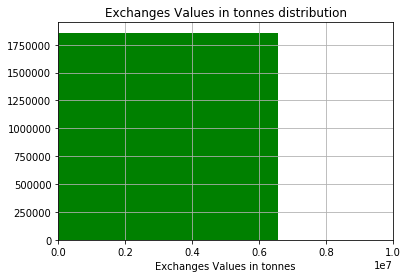

In [129]:

selected_live_stocks[selected_live_stocks['Unit']=='tonnes'].set_index('Item').Value.hist(facecolor='green', align='mid',bins= 10)
plt.xlim(xmin=0, xmax = 10**7)
plt.xlabel('Exchanges Values in tonnes')
plt.title('Exchanges Values in tonnes distribution')



Text(0.5, 1.0, 'Exchanges Values in K Dollars distribution')

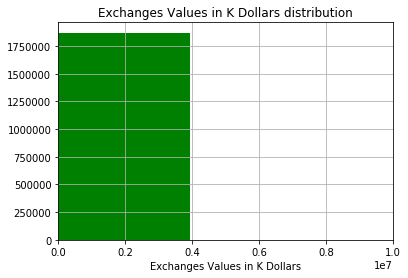

In [130]:

selected_live_stocks[selected_live_stocks['Unit']=='1000 US$'].set_index('Item').Value.hist(facecolor='green', align='mid',bins= 10)
plt.xlim(xmin=0, xmax =10**7)

plt.xlabel('Exchanges Values in K Dollars')
plt.title('Exchanges Values in K Dollars distribution')




Most of exchanges in tonnes ranges between $0-2*10^6$, some values go to $4*10^6$ tonnes\
Most of exchanges in Dollars ranges between $0-15*10^5$, some values go to $2*10^6$ dollars\
No particular error value are beeing observed nor specefic distribution (ex: uniform,gaussian...)\





Text(0.5, 1.0, 'Top 10 most exported crops in Quantity')

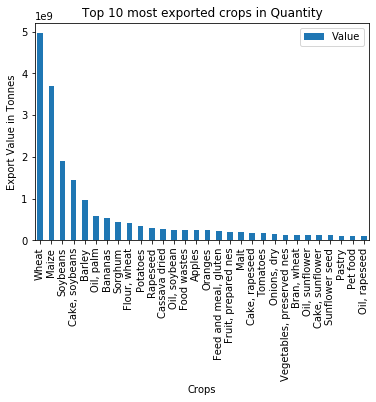

In [131]:
fig=selected_live_stocks[selected_live_stocks['Element'] == 'Export Quantity']\
                                                    .groupby(['Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:30]\
                                                    .plot(kind='bar')   
fig.set_xlabel('Crops')
fig.set_ylabel('Export Value in Tonnes')
fig.set_title('Top 10 most exported crops in Quantity')

Text(0.5, 1.0, 'Top 10 most exported crops in Value')

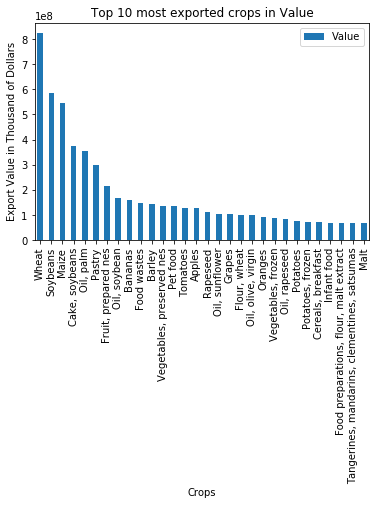

In [132]:
fig=selected_live_stocks[selected_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:30]\
                                                    .plot(kind='bar')
fig.set_xlabel('Crops')
fig.set_ylabel('Export Value in Thousand of Dollars')
fig.set_title('Top 10 most exported crops in Value')


In [133]:
selected_live_stocks[selected_live_stocks['Element'] == 'Export Quantity']\
                                                    .groupby(['Item','Item Code','Unit'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:10]\

Value
Item           Item Code Unit                
Wheat          15        tonnes  4.964318e+09
Maize          56        tonnes  3.688698e+09
Soybeans       236       tonnes  1.898618e+09
Cake, soybeans 238       tonnes  1.457406e+09
Barley         44        tonnes  9.574714e+08
Oil, palm      257       tonnes  5.787275e+08
Bananas        486       tonnes  5.387601e+08
Sorghum        83        tonnes  4.282439e+08
Flour, wheat   16        tonnes  4.033389e+08
Potatoes       116       tonnes  3.474876e+08

In [134]:
selected_live_stocks[selected_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Item','Item Code','Unit'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:10]\

Value
Item                Item Code Unit                 
Wheat               15        1000 US$  824027356.0
Soybeans            236       1000 US$  585520796.0
Maize               56        1000 US$  545500936.0
Cake, soybeans      238       1000 US$  374035507.0
Oil, palm           257       1000 US$  354954452.0
Pastry              22        1000 US$  299324586.0
Fruit, prepared nes 623       1000 US$  215899171.0
Oil, soybean        237       1000 US$  167687358.0
Bananas             486       1000 US$  160037908.0
Food wastes         653       1000 US$  147273683.0

In [135]:
selected_live_stocks[selected_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Item','Item Code','Unit'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:10]\

Value
Item                Item Code Unit                 
Wheat               15        1000 US$  824027356.0
Soybeans            236       1000 US$  585520796.0
Maize               56        1000 US$  545500936.0
Cake, soybeans      238       1000 US$  374035507.0
Oil, palm           257       1000 US$  354954452.0
Pastry              22        1000 US$  299324586.0
Fruit, prepared nes 623       1000 US$  215899171.0
Oil, soybean        237       1000 US$  167687358.0
Bananas             486       1000 US$  160037908.0
Food wastes         653       1000 US$  147273683.0

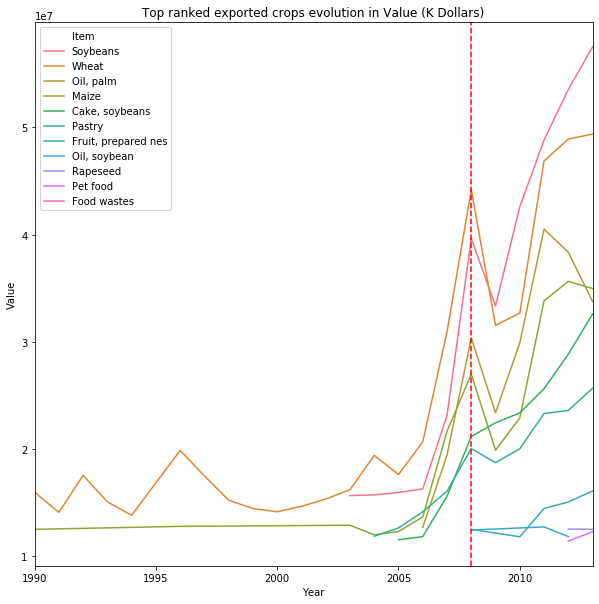

In [136]:
x= selected_live_stocks[selected_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Year','Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:100]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Item",
                   data=x)

ax.set_title('Top ranked exported crops evolution in Value (K Dollars)')
ax.set_xlim([1990,2013])
plt.axvline(2008, 0,10**7,color='r', linestyle='--')



(1990, 2013)

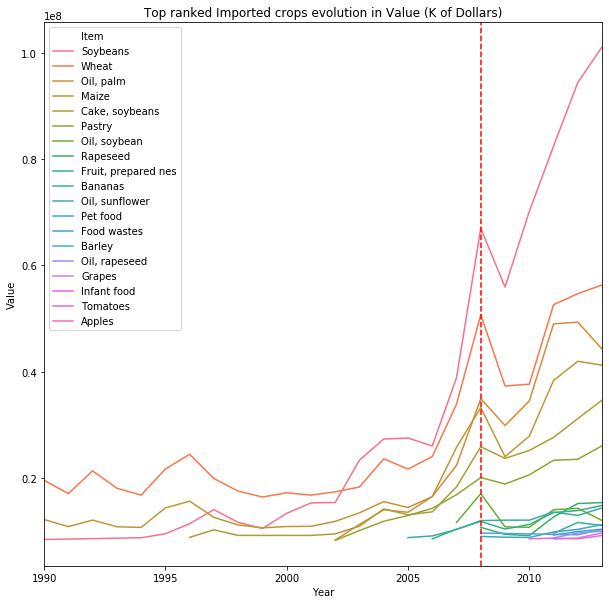

In [137]:
x= selected_live_stocks[selected_live_stocks['Element'] == 'Import Value']\
                                                    .groupby(['Year','Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()\
                                                    .reset_index()[:200]

plt.figure(figsize=(10,10))
ax = sns.lineplot(x="Year", y="Value", hue="Item",
                   data=x)
plt.axvline(2008, 0,10**7,color='r',linestyle='--')

ax.set_title('Top ranked Imported crops evolution in Value (K of Dollars)')

ax.set_xlim([1990,2013])




(1990, 2013)

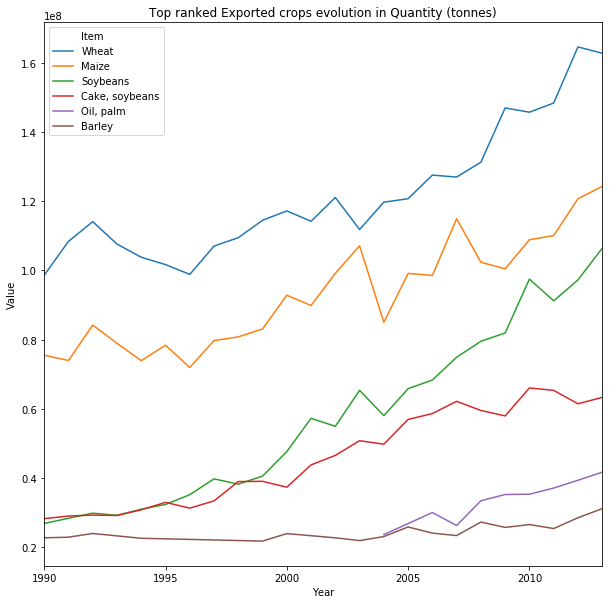

In [138]:
x= selected_live_stocks[selected_live_stocks['Element'] == 'Export Quantity']\
                                                    .groupby(['Year','Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:200]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Item",
                   data=x)

ax.set_title('Top ranked Exported crops evolution in Quantity (tonnes)')

ax.set_xlim([1990,2013])



(1990, 2013)

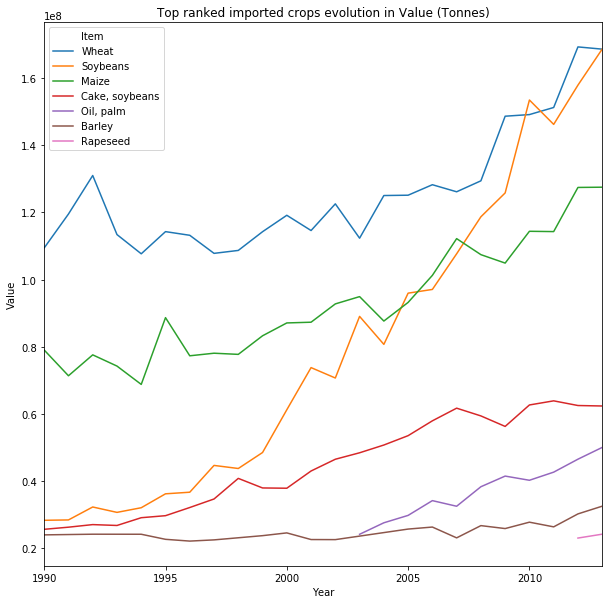

In [139]:
x= selected_live_stocks[selected_live_stocks['Element'] == 'Import Quantity']\
                                                    .groupby(['Year','Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:200]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Item",
                   data=x)

ax.set_title('Top ranked imported crops evolution in Value (Tonnes)')
ax.set_xlim([1990,2013])





Plots gives some insights on price evolution top ranked exchanged crops. For instance one can observe prices inflation in value plots right at the **2008** economic crises. 

We can as well get insights in food trend identification. For instance, soybeans rapid increase over the years can be a sign of trend around this commodity.



***Year***

In [140]:
clean_live_stocks.Year.unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

Time frame convered spans form 1961-2013

***Flags***

In [141]:
clean_live_stocks.Flag.unique()

array([nan, '*', 'F', 'R', 'A'], dtype=object)

Nan : Official Data \
\* : Unofficial Figure\
F : FAO estimate \
R : Estimated data using trading partners database\
A : Aggregate, may include official, semi-official, estimated or calculated data

In [142]:
clean_live_stocks.groupby('Flag')['Area Code'].sum().nlargest()

Flag
A    16954569990
F       79355063
*       44393818
R       26461451
Name: Area Code, dtype: int64

NaN          5590861



### Question insights 

In this project, we are interested in specific crops investigation in terms of global demand, production quantity... 

Ability of chosing between different scales, crops categories and commodities will allow deeper investigation.

Lets select Bananas as it was them most exchanged commidty across the years and investigate the role of different countries. 


(1990, 2013)

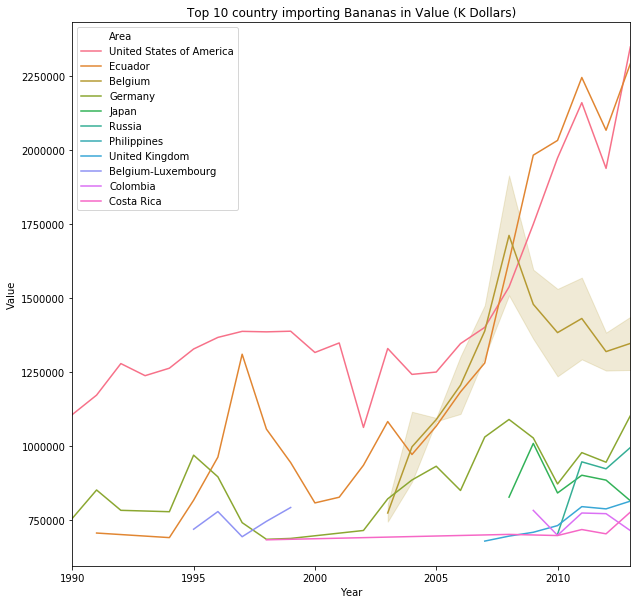

In [143]:
Banana_live_stocks= countries_live_stock[countries_live_stock['Item'] == 'Bananas'].copy()


x= Banana_live_stocks[Banana_live_stocks['Unit'] == '1000 US$']\
                                                    .groupby(['Year','Area','Element'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:130]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

ax.set_title('Top 10 country importing Bananas in Value (K Dollars)')
ax.set_xlim([1990,2013])




(1990, 2013)

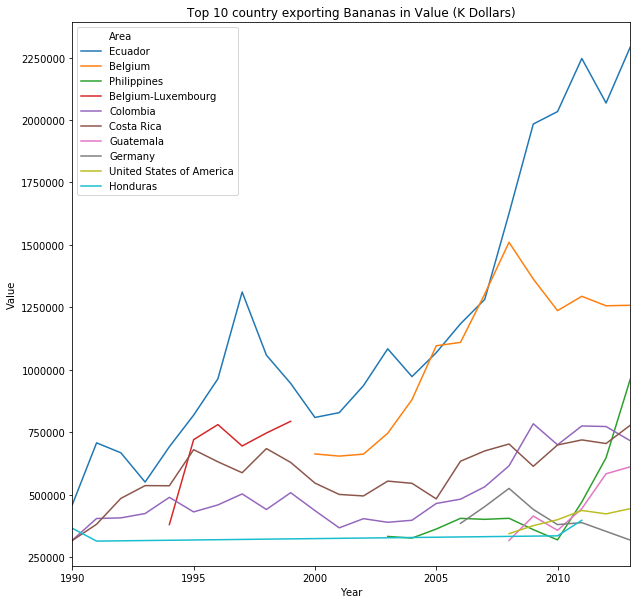

In [144]:

Banana_live_stocks= countries_live_stock[countries_live_stock['Item'] == 'Bananas'].copy()


x= Banana_live_stocks[Banana_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Year','Area'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:130]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

ax.set_title('Top 10 country exporting Bananas in Value (K Dollars)')

ax.set_xlim([1990,2013])



(1990, 2013)

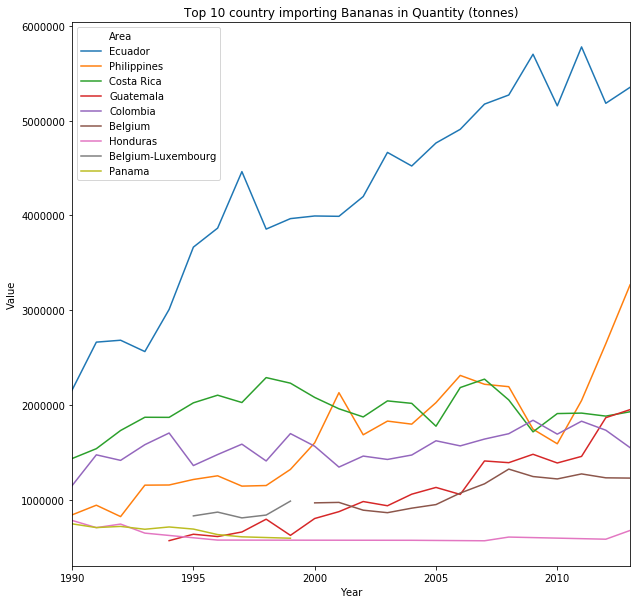

In [145]:
Banana_live_stocks= countries_live_stock[countries_live_stock['Item'] == 'Bananas'].copy()


x= Banana_live_stocks[Banana_live_stocks['Element'] == 'Export Quantity']\
                                                    .groupby(['Year','Area'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:270]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

ax.set_title('Top 10 country importing Bananas in Quantity (tonnes)')
ax.set_xlim([1990,2013])



Those plots can give some interesting insights on commodity market and exchanges. For instance Belgium ranks as second biggest exporter of bananas in Value.\
However in quantity it is the 5th one. Same for Importation.
One could think that Belgium doesn't produce bananas but only act as an intermedier,buying low, selling high in the banana market. \
To confirm this statement, we could investigate belgium production area for bananas in crop data set. 



(1990, 2013)

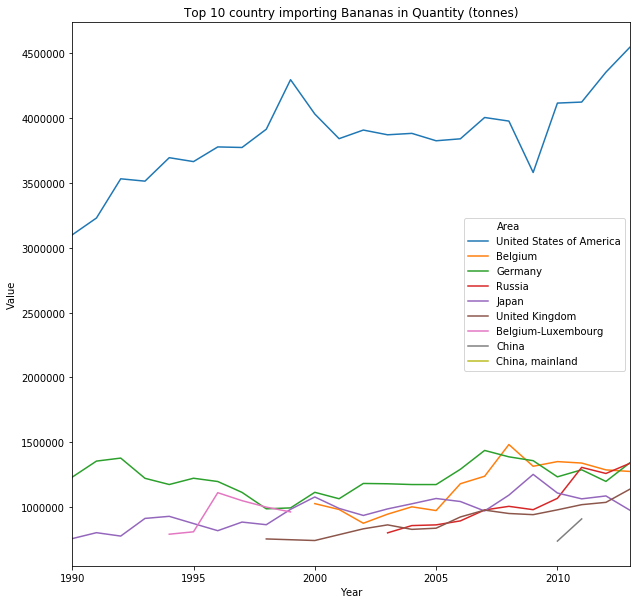

In [146]:
Banana_live_stocks= countries_live_stock[countries_live_stock['Item'] == 'Bananas'].copy()


x= Banana_live_stocks[Banana_live_stocks['Element'] == 'Import Quantity']\
                                                    .groupby(['Year','Area'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:170]\
                                                    .reset_index()
plt.figure(figsize=(10,10))



ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

ax.set_title('Top 10 country importing Bananas in Quantity (tonnes)')
ax.set_xlim([1990,2013])



## Correlation

Correlation comes in handy for data set investigation and understanding. One could question inner feature relationships as well as 
as relationships with other feature.\
In our case correlation between export and import in quantity and value could reveal interesting information on pricing evolution with respect to global food demand.\
In this project we also question the link between production and global food demand. Using bananas as an exemple we could start answering that question. 



Lets us now make an item Centric Dataframe to investigate correlation beween Export and Import both in Quantity and Values.

In [147]:

x= selected_live_stocks.groupby(['Element','Item'])['Value']\
                                                    .sum()\
                                                    .to_frame()
   
item_centric = pd.concat([x.loc['Export Quantity'].rename(columns={ 'Value':'ExpQuantity'}),\
                   x.loc['Export Value'].rename(columns={ 'Value':'ExpValue'})\
                   ,x.loc['Import Quantity'].rename(columns={ 'Value':'ImpQuantity'}),\
                   x.loc['Import Value'].rename(columns={ 'Value':'ImpValue'})],\
                   axis = 1,sort=False).sort_values(by=["ExpQuantity",'ExpValue','ImpQuantity','ImpValue'], ascending = False)
item_centric.head()

ExpQuantity     ExpValue   ImpQuantity     ImpValue
Wheat           4.964318e+09  824027356.0  5.276072e+09  976048199.0
Maize           3.688698e+09  545500936.0  3.719216e+09  634347704.0
Soybeans        1.898618e+09  585520796.0  2.442040e+09  879262316.0
Cake, soybeans  1.457406e+09  374035507.0  1.418449e+09  411812339.0
Barley          9.574714e+08  142277897.0  9.569074e+08  163450453.0

In [148]:
pd.concat([item_centric.min().rename('min'), item_centric.max().rename('max')], axis=1)


min           max
ExpQuantity  0.0  4.964318e+09
ExpValue     0.0  8.240274e+08
ImpQuantity  0.0  5.276072e+09
ImpValue     0.0  9.760482e+08

We clearly see scale difference in the Values for each 'Unit'

Min MaxScaling will allow us to obtain reliable information for correlation 


In [149]:
from sklearn import preprocessing

item_centric_values = item_centric.values
min_max_scaler = preprocessing.MinMaxScaler()
item_centric_values = min_max_scaler.fit_transform(item_centric_values)
item_centric_normalized = pd.DataFrame(item_centric_values, columns=item_centric.columns)

In [150]:
item_centric_normalized.corr()

ExpQuantity  ExpValue  ImpQuantity  ImpValue
ExpQuantity     1.000000  0.891058     0.997404  0.886295
ExpValue        0.891058  1.000000     0.899517  0.990329
ImpQuantity     0.997404  0.899517     1.000000  0.902547
ImpValue        0.886295  0.990329     0.902547  1.000000

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


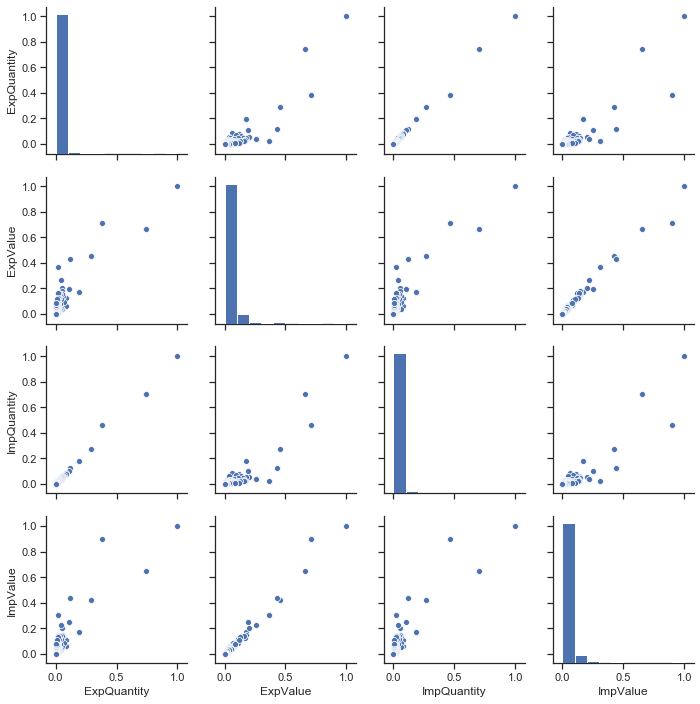

In [151]:
sns.set(style="ticks")
sns.pairplot(item_centric_normalized)

... Let us now focus on bananas with a year centric Data Frame. 

In [152]:
#Processing the banana production per year output from corps to make it complient for merging 
bananas = pd.read_csv(datapath + current_fao +"bananas_prod.csv",sep=",", encoding="latin_1")
sum_ = bananas.groupby('year')['value'].sum().sort_values(ascending =False)\
                                        .to_frame()\
                                        .reset_index()
sum_=sum_.rename(columns={'year':'Year'})
sum_=sum_.rename(columns={'value':'Surface Production'})

sum_.Year= sum_.Year.apply(lambda x: int(x))
sum_.head()


Year  Surface Production
0  2007          93652856.0
1  2006          89788488.0
2  2005          85267584.0
3  2004          80866125.0
4  2003          76112799.0

In [153]:
x= selected_live_stocks[selected_live_stocks['Item']=='Bananas'].groupby(['Element','Year'])['Value']\
                                                    .sum().sort_values(ascending =False)\
                                                    .to_frame()
 
year_centric = pd.concat([x.loc['Export Quantity'].rename(columns={'Value':'ExpQuantity'}),\
                         x.loc['Import Quantity'].rename(columns={'Value':'ImpQuantity'})],axis = 1,sort=False)\
                        .sort_values(by=["ExpQuantity",'ImpQuantity'], ascending = False).reset_index()[6:-1]\
                        .reset_index()
                         


year_centric.Year=year_centric.Year.apply(lambda x: int(x))
year_centric['Surface Production']= sum_['Surface Production']
year_centric=year_centric.drop(columns = ['index','Year'])
year_centric.head()

ExpQuantity  ImpQuantity  Surface Production
0   17527838.0   18672487.0          93652856.0
1   17001013.0   16876259.0          89788488.0
2   16383011.0   15855090.0          85267584.0
3   15725886.0   15538832.0          80866125.0
4   15297949.0   15187577.0          76112799.0

In [154]:
year_centric.corr()

ExpQuantity  ImpQuantity  Surface Production
ExpQuantity            1.000000      0.99719            0.982888
ImpQuantity            0.997190      1.00000            0.982180
Surface Production     0.982888      0.98218            1.000000

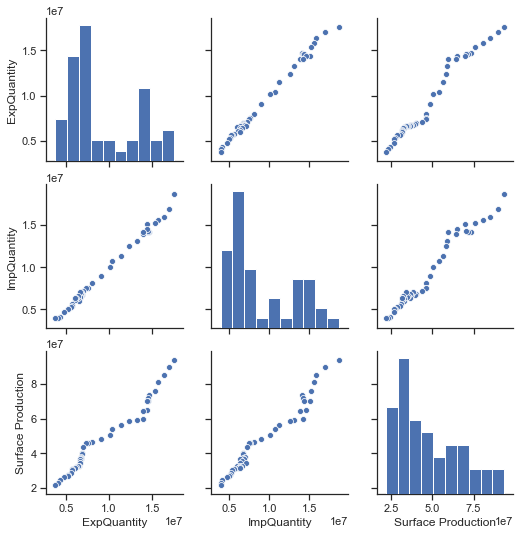

In [155]:
sns.set(style="ticks")
sns.pairplot(year_centric)

`Output`: Interestingly, production quantity is also correlated with both export and import. It gives insight on how coutry production increases in respond to global demand instead of local market queries. 

## Conclusion   :
Data contains missing values, only the ones in the Value feature were discarded. Data contains information regarding the exchanges (import and export) per countrie, region and continent. Exchanges are both explained in termes of value (Thousands of dollars) and quantity (tonnes). All kinds of crops figure in the Item feature as single items as well as per categories. The processing was made so that we can easly chose a focus on a specific category of crops, chose between different scales. Correlations were made to provide insights on the questions asked as well as data set investigation. 


<a id="questions"></a>
# Data to Answer the Questions 
The questions here are different from what we actually did for the data story as we slittly reformulated the aim of the project during Milestone 3. The updated questions can be found on the Data story directly or in the ReadMe. 

##### Question 1. 
What is the global evolution of the cultivated surface per country from 1995 to 2007?

(1995, 2007)

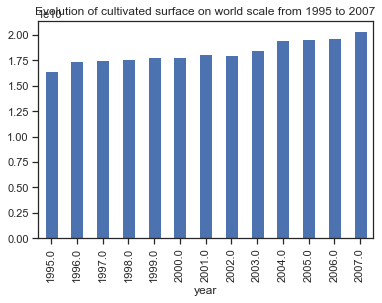

In [156]:
#use of the Crops data frame: 
world_surface = crops[(crops.country_or_area == 'World +') \
                      & (crops.year >= 1995) & (crops.year <= 2007)]\
                        .groupby('year')['value'].sum()
world_surface.plot(kind='bar')
plt.title('Evolution of cultivated surface on world scale from 1995 to 2007')
ax.set_xlim([1995,2007])

We will do this processing for all the countries. 

##### Question 2. 
What is the area lost of savanna, shrubland, grassland and forest per country per year?

We will do the same processing than for the `Crops` data set for all the countries. 

In [157]:
biomesCountry.head()

Country  Ecosystem  Year   Area_loss        Land  Area_loss_percentage  \
0  Afghanistan  Grassland  1995   2323.1605  6.5223e+07              0.003562   
1  Afghanistan  Grassland  1996   5349.2426  6.5223e+07              0.008201   
2  Afghanistan  Grassland  1997   1191.8687  6.5223e+07              0.001827   
3  Afghanistan  Grassland  1998  19674.0298  6.5223e+07              0.030164   
4  Afghanistan  Grassland  1999   6007.4143  6.5223e+07              0.009211   

   Area_loss_number  
0      3.561873e+05  
1      8.201467e+05  
2      1.827375e+05  
3      3.016425e+06  
4      9.210576e+05

##### Question 3. 
Do we see a correlation between the area lost by ecosystems and the area gain by agriculture?

For this question we will use results of `Question 1.` and `Question 2.`

In [158]:
#Operation to keep only what is needed in this question for the "Crops" dataframe:
cropsHa=crops.where(crops['element']=='Area Harvested')
cropsHa=cropsHa.where(crops['year']>1994).dropna().astype({'year':'int64'})
cropsHa = cropsHa.drop(['unit', 'element'], axis=1)\
                 .rename(columns={"value": "Area_cultivated","country_or_area": "Country", "year":"Year"})
cropsHa.head(-1)

Country  Year  Area_cultivated          category
0        Americas +  2007          49404.0  agave_fibres_nes
1        Americas +  2006          49404.0  agave_fibres_nes
2        Americas +  2005          49404.0  agave_fibres_nes
3        Americas +  2004          49113.0  agave_fibres_nes
4        Americas +  2003          48559.0  agave_fibres_nes
...             ...   ...              ...               ...
2255209     World +  2000          34258.0    yautia_cocoyam
2255210     World +  1999          33897.0    yautia_cocoyam
2255211     World +  1998          32078.0    yautia_cocoyam
2255212     World +  1997          33884.0    yautia_cocoyam
2255213     World +  1996          33864.0    yautia_cocoyam

[196520 rows x 4 columns]

In [159]:
# Perform the sum of all the area cultivated independetly of the crop type:
totalCropsHa=cropsHa.groupby(['Country', 'Year', ]).Area_cultivated.sum().to_frame()
totalCropsHa.head(-1)

Area_cultivated
Country     Year                 
Afghanistan 1995        9729690.0
            1996        9482690.0
            1997        9562790.0
            1998        9765590.0
            1999        8932590.0
...                           ...
Zimbabwe    2002        9820673.0
            2003        9902783.0
            2004       10457568.0
            2005       10891846.0
            2006       11431173.0

[3155 rows x 1 columns]

In [160]:
# Perform the sum of all the area losses independetly of the ecosystem:
#biomesCountry=biomesCountry[(biomesCountry != 0).all(1)]
totalBiomesCountry=biomesCountry.groupby(['Country', 'Year']).Area_loss.sum().to_frame()
totalBiomesCountry.head(-1)

Area_loss
Country     Year              
Afghanistan 1995  2.507324e+04
            1996  2.606821e+04
            1997  1.862108e+04
            1998  5.100797e+04
            1999  3.067655e+04
...                        ...
Zimbabwe    2002  2.274862e+06
            2003  2.191446e+06
            2004  3.387613e+06
            2005  3.068317e+06
            2006  3.018875e+06

[2463 rows x 1 columns]

In [161]:
loss_cultivated=totalBiomesCountry.merge(totalCropsHa, on=['Country','Year'])
loss_cultivated.head(-1)

Area_loss  Area_cultivated
Country     Year                               
Afghanistan 1995  2.507324e+04        9729690.0
            1996  2.606821e+04        9482690.0
            1997  1.862108e+04        9562790.0
            1998  5.100797e+04        9765590.0
            1999  3.067655e+04        8932590.0
...                        ...              ...
Zimbabwe    2002  2.274862e+06        9820673.0
            2003  2.191446e+06        9902783.0
            2004  3.387613e+06       10457568.0
            2005  3.068317e+06       10891846.0
            2006  3.018875e+06       11431173.0

[2242 rows x 2 columns]

In [162]:
loss_cultivated.corr()

Area_loss  Area_cultivated
Area_loss         1.000000         0.088894
Area_cultivated   0.088894         1.000000

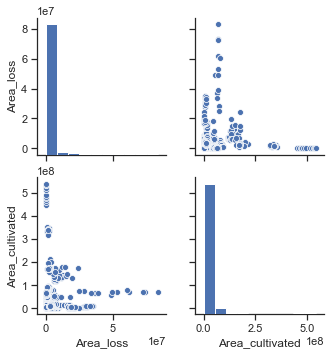

In [163]:
sns.set(style="ticks")
sns.pairplot(loss_cultivated);

##### Question 4. 
For each selected crop, sojabean, banana, wheat, rice and palm oil, what pourcentage of the total cultivated area do they represent? 

We will show how we will answer this question with the example of `Bananas`. We will use first the data obtained from the web scrapping and added to the dataframe containing the burned areas of the biomes. Then, we will compare it to the `Crops` dataset.

##### Question 5. 
If there is a correlation between an increase in area cultivated and area lost from all the ecosystems, what would be approximatively the area lost because of the selected crops in particular?

We will need the 3 data sets here, each time for the specific crop. For the `Crops` dataset we will need to have the area harvested by countries, maybe grouping by continents. For the `Biomes`, we will need the area lost by countries by year. Finally, for the `Livestock` dataset, we will need the global importation of the products we study. 

##### Question 6. 
Are sojabean, banana, wheat, rice and palm oil meant for exportation and/or importation for each country over the years? Check more precisely for different economical segments and regions.

We will need the `Livestock` dataset and study the importation and exportation and the production quantity of the product in the data set `Crops` and then link the informations. We will do it first for the countries individually and then for the economical segments and the regional areas too. 

##### Question 7. 
How can we identify  short term food trends and what is its impact on the global and country wise area loss?

Using `LiveStock` to assert global food demand evolution for specfic commodities (or crops) combined with `Crops` information on production quantity evolution,  one could find patterns or metrics for a global consumption trend. If we correlate with `Savanna` and `Forest`, we might as well assess the destructive impact of the observed trendy items. 

<a id="maps"></a>
# World Maps

You have the option to save the map as a html file by putting 'True' for the 'save_html' arguments. 

In [143]:
import geopandas as gpd
import json

In [144]:
shapefile = 'Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['Country', 'country_code', 'geometry']
gdf.head()

Country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [145]:
print(gdf[gdf['Country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])
gdf['Country']=gdf['Country'].str.replace('Russian Federation', 'Russia', regex=False)

        Country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [146]:
#datasets for the biomes 
biomesCountry_savan = biomesCountry[biomesCountry['Ecosystem'] == 'Savanna']
biomesCountry_shrub = biomesCountry[biomesCountry['Ecosystem'] == 'Shrubland']
biomesCountry_grass = biomesCountry[biomesCountry['Ecosystem'] == 'Grassland']
biomesCountry_forest = biomesCountry[biomesCountry['Ecosystem'] == 'Forest']

In [147]:
from bokeh.io import curdoc, output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LogColorMapper, ColorBar, Slider, HoverTool, LogTicker, LinearColorMapper
from bokeh.models import CustomJS
from bokeh.models import ColorBar, LogTicker, BasicTicker
from bokeh.palettes import brewer
from bokeh.layouts import widgetbox, row, column
from bokeh.resources import CDN
from bokeh.models.widgets import Tabs, Panel
from bokeh.plotting import figure, output_file, save

### Map for the biomes
A mean on all the years was performed. You can find it in the 'Biomes' part.


In [148]:
def json_fct(normalVal, selectedDataSet):
    #changes here:
    merged = gdf.merge(selectedDataSet, left_on = 'Country', right_on = 'Country', how = 'left')    
    #Replace NaN values to string 'No data'.
    merged[normalVal].fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = title + ' in %d' %yr

    
def makeMap_biomes(title, legend, infoToPlot, normalVal, selectedDataSet, Scale, chosenPalette, lin, save_html): 
    box=[]
    biomes = np.unique(selectedDataSet['Ecosystem'])
    for i in range(len(biomes)): 
        #Input GeoJSON source that contains features for plotting.
        geosource = GeoJSONDataSource(geojson = json_fct(normalVal, selectedDataSet[selectedDataSet['Ecosystem'] == biomes[i]]))
        #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
        #changes here:
        if (lin): 
            #Define a sequential multi-hue color palette.
            grad=round(Scale[1]/0.1,0)
            palette = brewer[chosenPalette][grad]
            #Reverse color order so that dark red is highest loss.
            palette = palette[::-1]
            color_mapper = LinearColorMapper(palette = palette, low=Scale[0], high=Scale[1],  nan_color = '#d9d9d9')
            #Define custom tick labels for color bar.
            tick_labels = {'0': '0%', '0.1': '0.1%', '0.2': '0.2%', '0.3': '0.3%', '0.4': '0.4%', '0.5': '0.5%','0.6':'0.6%', '0.7':'0.7%', '0.8':'0.8%', '0.9':'0.9%'}
            #Create color bar. 
            color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                             border_line_color=None, location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
        else: 
            #Define a sequential multi-hue color palette.
            grad=round(np.log10(Scale[1]/Scale[0]),0)
            palette = brewer[chosenPalette][grad]
            #Reverse color order so that dark red is highest loss.
            palette = palette[::-1]
            color_mapper = LogColorMapper(palette = palette, low =Scale[0], high =Scale[1], nan_color = '#d9d9d9')
            #Define custom tick labels for color bar.
            tick_labels = {'100': '1e-6%', '1000': '1e-5%', '10000': '1e-4%', '100000': '1e-3%', '1000000': '0.01%', '10000000': '0.1%', '100000000': '1%', '1000000000': '10%', '10000000000': '100%'}
            color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                             border_line_color=None, location = (0,0), orientation = 'horizontal', ticker=LogTicker(), major_label_overrides = tick_labels)

        #Add hover tool
        hover = HoverTool(tooltips = [ ('Country','@Country'),(legend, '@'+normalVal)])
        #Create figure object.
        p = figure(title =  title, plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
        p.xgrid.grid_line_color = None
        p.ygrid.grid_line_color = None
        #Add patch renderer to figure. 
        p.patches('xs','ys', source = geosource, fill_color = {'field' :infoToPlot, 'transform' : color_mapper},
                  line_color = 'black', line_width = 0.25, fill_alpha = 1)
        #Specify layout
        p.add_layout(color_bar, 'below')

        # Create a button for each year.
        box.append(Panel(child=p, title='%s' %biomes[i]))
    
    # Make a column layout of widgetbox(slider) and plot, and add it to the current document
    # Assign the panels to Tabs
    tabs = Tabs(tabs=box)
    
    if(save_html):
        #save file in HTML link
        output_file(title+'.html', title=title)
        save(tabs)
    else:
        #Display plot inline in Jupyter notebook
        output_notebook()
        #Display plot
        show(tabs)

    return tabs  

In [149]:
layout = makeMap_biomes('Biomes Losses per country', 'Area loss (in Ha)', 'Area_loss_number','Area_loss', biomesMean, [1e2,1e9], 'Reds', False, False)

Loading BokehJS ...

### Maps for production and exports
You can modulate the years on which you want to see the data by adding the years of interest in the vector corresponding in the arguments. By using the predefined vecor 'year', you will plot all the years.

In [150]:
year = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]

In [151]:
def json_fct(normalVal, selectedYear, selectedDataSet):
    #changes here:
    df_yr = selectedDataSet[selectedDataSet['Year'] == selectedYear]
    merged = gdf.merge(df_yr, left_on = 'Country', right_on = 'Country', how = 'left')    
    #Replace NaN values to string 'No data'.
    merged[normalVal].fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = title + ' in %d' %yr

    
def makeMap(title, legend, infoToPlot, normalVal, year, selectedDataSet, Scale, chosenPalette, lin, save_html): 
    box=[]
    for i in range(len(year)): 
        #Input GeoJSON source that contains features for plotting.
        geosource = GeoJSONDataSource(geojson = json_fct(normalVal, year[i], selectedDataSet))
        #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
        #changes here:
        if (lin): 
            #Define a sequential multi-hue color palette.
            grad=round(Scale[1]/0.1,0)
            palette = brewer[chosenPalette][grad]
            #Reverse color order so that dark red is highest loss.
            palette = palette[::-1]
            color_mapper = LinearColorMapper(palette = palette, low=Scale[0], high=Scale[1],  nan_color = '#d9d9d9')
            #Define custom tick labels for color bar.
            tick_labels = {'0': '0%', '0.1': '0.1%', '0.2': '0.2%', '0.3': '0.3%', '0.4': '0.4%', '0.5': '0.5%','0.6':'0.6%', '0.7':'0.7%', '0.8':'0.8%', '0.9':'0.9%'}
            #Create color bar. 
            color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                             border_line_color=None, location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
        else: 
            #Define a sequential multi-hue color palette.
            grad=round(np.log10(Scale[1]/Scale[0]),0)
            palette = brewer[chosenPalette][grad]
            #Reverse color order so that dark red is highest loss.
            palette = palette[::-1]
            color_mapper = LogColorMapper(palette = palette, low =Scale[0], high =Scale[1], nan_color = '#d9d9d9')
            #Define custom tick labels for color bar.
            tick_labels = {'100': '1e-6%', '1000': '1e-5%', '10000': '1e-4%', '100000': '1e-3%', '1000000': '0.01%', '10000000': '0.1%', '100000000': '1%', '1000000000': '10%', '10000000000': '100%'}
            color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                             border_line_color=None, location = (0,0), orientation = 'horizontal', ticker=LogTicker(), major_label_overrides = tick_labels)

        #Add hover tool
        hover = HoverTool(tooltips = [ ('Country','@Country'),(legend, '@'+ normalVal)])
        #Create figure object.
        p = figure(title =  title, plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
        p.xgrid.grid_line_color = None
        p.ygrid.grid_line_color = None
        #Add patch renderer to figure. 
        p.patches('xs','ys', source = geosource, fill_color = {'field' :infoToPlot, 'transform' : color_mapper},
                  line_color = 'black', line_width = 0.25, fill_alpha = 1)
        #Specify layout
        p.add_layout(color_bar, 'below')

        # Create a button for each year.
        box.append(Panel(child=p, title='%s' %year[i]))
    
    # Make a column layout of widgetbox(slider) and plot, and add it to the current document
    # Assign the panels to Tabs
    tabs = Tabs(tabs=box)
    
    if(save_html):
        #save file in HTML link
        output_file(title+'.html', title=title)
        save(tabs)
    else:
        #Display plot inline in Jupyter notebook
        output_notebook()
        #Display plot
        show(tabs)

    return tabs 

#### Map for production ratio over the world

In [152]:
crops_indiv_prod_world = crops_indiv_prod_regions[crops_indiv_prod_regions['country_or_area']=='World +']
crops_indiv_prod_world = crops_indiv_prod_world.groupby(['year']).value.agg(sum).reset_index().rename(columns={'value':'total', 'year':'Year'})

In [153]:
#if you want to change the products printed : can use 'crops_totals_area' instead
crops_prod = crops_indiv_prod.copy()

#clean the ab dataframe obtained from crop:
#cropsCountries_area = crops_prod.where(crops_prod['year']>1994).dropna().astype({'year':'int64'})
cropsCountries_prod = crops_prod.drop(['unit', 'element'], axis=1).rename(columns={"country_or_area":"Country", "year":"Year"})
#Sum up all categories:
cropsCountries_prod_total = cropsCountries_prod.groupby(['Country', 'Year']).value.agg(sum).reset_index()

#merge with the land datafram to do the percentage (area cultivated over total area of the country times 100)
cropsCountries_prod_total = crops_indiv_prod_world.merge(cropsCountries_prod_total, on='Year')
cropsCountries_prod_total['Production_mondial_percentage'] = cropsCountries_prod_total['value']/cropsCountries_prod_total['total']
cropsCountries_prod_total['Production_mondial_number'] = (cropsCountries_prod_total['Production_mondial_percentage']*1e8)

In [154]:
layout = makeMap('Evolution of part of global production per country', 'Production (tonnes)', 'Production_mondial_number', 'value', [1995,2007], cropsCountries_prod_total, [1e2,1e9],'PuBu', False, False)

Loading BokehJS ...

#### Map for export ratio over the world

In [155]:
export_world=livestock.drop(columns=['Area Code', 'Item Code', 'Element Code', 'Year Code', 'Unit', 'Flag'])
export_world=export_world[(export_world['Area']=='World')&(export_world['Element']=='Export Quantity')]
export_world=export_world.groupby(['Year']).Value.agg(sum).reset_index().rename(columns={'Value':'total'})

In [156]:
countries_export = countries_live_stock.drop(columns=['Group','Area Code', 'Item Code', 'Element Code', 'Year Code', 'Unit', 'Flag'])
countries_export=countries_export[countries_export['Element']=='Export Quantity'].drop(columns=['Element', 'Item'])

KeyError: "['Group'] not found in axis"

In [157]:
#if you want to change the products printed : can use 'crops_totals_area' instead
crops_export = countries_export.copy()

#clean the ab dataframe obtained from crop:
#cropsCountries_area = crops_prod.where(crops_prod['year']>1994).dropna().astype({'year':'int64'})
cropsCountries_export = crops_export.rename(columns={"Area":"Country"})
#Sum up all categories:
cropsCountries_export_total = cropsCountries_export.groupby(['Country', 'Year']).Value.agg(sum).reset_index()

#merge with the land datafram to do the percentage (area cultivated over total area of the country times 100)
#crops_indiv_prod_world['Land']=pd.to_numeric(land_areas['Land'],errors='coerce')
cropsCountries_export_total = export_world.merge(cropsCountries_export_total, on='Year')
cropsCountries_export_total['Production_mondial_percentage'] = cropsCountries_export_total['Value']/cropsCountries_export_total['total']
cropsCountries_export_total['Production_mondial_number'] = (cropsCountries_export_total['Production_mondial_percentage']*1e8)

NameError: name 'countries_export' is not defined

In [158]:
layout = makeMap('Evolution of part of global export per countries', 'Export (tonnes)', 'Production_mondial_number', 'Value', [1995,2005], cropsCountries_export_total, [1e2,1e9],'BuPu', False, False)

NameError: name 'cropsCountries_export_total' is not defined

<a id="correlation"></a>
# Correlation

Correlation were here computed for each biomes (All biomes, shrubland, grassland, savanna) for region scale. Heatmaps were also saved in Result Files. One constraint was to find the matching crops between livestock/bioms data and normalised tokenised form in  crops data set. This part leads to the first element taken into account for crops destructivity impact: `crop-region loss correlation`. 

In [125]:
#Find meaningfull correlations : 
biomes=["Savanna", "Shrubland","Grassland"]


for biome in biomes :
    
    savannaRegion_corr=savannaRegion[savannaRegion.Ecosystem==biome]
    print('Find all regional correlations...')
    regional_df=(find_correl(regions,savannaRegion_corr,crops_regions_prod))
    heatmaps(regional_df,biome)
    regional_df.to_csv('ResultsFinal/'+'Region'+biome+"LossFinal.csv")


Find all regional correlations...
matching crops...
Wall time: 0 ns


AttributeError: 'list' object has no attribute 'Item'

In [115]:
def merge_corr(actors,live_stock_export, loss_data,live_item,df):
    for loss,crops in actors.items():
        
        stock = live_stock_export[live_stock_export['Item'] == live_item ]\
        
        stock = stock[stock['Area'] ==  loss]


        
        stock =  stock[stock['Element'] == 'Export Quantity']\
                                                            .set_index(['Year'])['Value']\
                                                            .sort_index(ascending = False)\
                                                            .loc[2007:1995].to_frame()
        
        loss_item.Year=loss_item.Year.apply(lambda x: int(x))
        

        x  = loss_data[loss_data.Country == loss].groupby(['Year'])['Area_loss']\
                             .sum()\
                             .sort_index(ascending =False).loc[2007:1995]\
                             .to_frame()
        
        x = x.dropna()
        stock=stock.dropna()


        if(not x.empty and  not stock.empty):

            year_centric = pd.concat([x['Area_loss'],\
                                 stock['Value'].rename(columns={'Value':'Area_Harvested'})],axis = 1,sort=False)

            corr = correlate(year_centric,True)
            df.loc[live_item.capitalize(),loss] =np.around(corr,decimals=2)
                           
    return df

In [116]:
#Compute correlation between export and loss data 
#Normalizes the merged input before correlation using sklearn library. 

def correlate(years,mode ):
    from sklearn import preprocessing
    year_centric_norm = years
    min_max_scaler = preprocessing.MinMaxScaler()
    year_centric_norm = min_max_scaler.fit_transform(year_centric_norm)
    year_centric_norm = pd.DataFrame(data=year_centric_norm, columns=years.columns)
    corr =  year_centric_norm.corr().Area_loss.get(0) 
    return corr 




In [117]:
#Finding the matching crops between exports an
def comparable_elements(crops_data, loss_data):
    actors ={}
    for x in loss_data :
        for y in crops_data:
            if x in y :
                actors[x]=y
    return actors 

In [118]:
def comparable_crops(crops_data, live_stock_scale):
    actors ={}
    top_exported_crops = crops_data[crops_data.year.between(1995.0,2007.0)]
    top_exported_crops =top_exported_crops.groupby(['category'])['value'].sum()\
                                                                 .sort_values(ascending =False).to_frame()\
                                                                 .reset_index().category

    lower_crops = sorted(live_stock_scale.Item.unique())
    lower_crops = [item.lower() for item in lower_crops]
    for x in lower_crops :
        tuples = []
        for y in top_exported_crops:

            y_= y.split('_')[0]+', '+y.split('_')[1]  if  len(y.split('_')) >1  else y.split('_')[0]
            if x.startswith(y_) :
                actors[x.capitalize()]=y
                        
        
    return actors 

In [119]:
#Outputs the matching regions between the Livestock and Loss dataframes 
def find_key_actors(data_scale,crop):
    temps= data_scale[data_scale['category'] == crop].copy()
 

    data_scale=data_scale.groupby('country_or_area')["value"]\
                .sum().sort_values(ascending=False).to_frame().reset_index().country_or_area
        
    return data_scale 

In [120]:
def find_correl(stock_scale,biom_scale,crop_scale):

    bioms_data=biom_scale.Country.unique()
    crops_data=crop_scale.country_or_area.unique()
    crops_item= crop_scale.category.unique()

    %time print('matching crops...')
    crops_ = comparable_crops(crop_scale,stock_scale)
    df= pd.DataFrame(data=[])
    for crops_item, stock_item in crops_.items(): 
        actors_corr_ = []
        top_actors= find_key_actors(crop_scale,crops_item)

        

        actors_=comparable_elements(top_actors,bioms_data)
        df_ =  merge_corr(actors_,stock_scale,biom_scale,crops_item,df) 
        df_=df_.fillna(0)
    return df_

In [121]:
import seaborn as sns
def heatmaps (df,biome):
    fig = plt.figure(figsize=(10,10))

    #mask[np.triu_indices(len(mask))] = True
    sns_plot=sns.heatmap(df, vmin = -1, vmax = 1, center = 0, cmap = "coolwarm",xticklabels=df.columns,yticklabels=df.index)
    fig.savefig("ResultsFinal/"+biome+".png",dpi=300, bbox_inches='tight')

Investigation of the yield export in the total production quantity for each crop for each country. 
Dividing the export quantity by the production gives out ` export ratio`.


In [124]:
#Calculation food production per crop per country


dict_ = comparable_crops(crops_countries_prod,Export_countries)# Matching crops
list_=[key for key in list(dict_.values())]# Matching crops

country_test_prod=crops_countries_prod[crops_countries_prod.category.isin(list_)]
country_test_prod=country_test_prod.replace(list(dict_.values()),list(dict_
                                                                      .keys()))
#Preparing for merging
country_test_prod=country_test_prod.rename(columns={'category' : 'Item', 'country_or_area':'Area', 'year':'Year','value':'ProdQuantity'})
country_test_prod.Year=country_test_prod.Year.apply(lambda x: int(x))
country_test_prod=country_test_prod.drop(columns= ['unit','element'])



NameError: name 'Export_countries' is not defined

In [ ]:
Export_countries =  Export_countries[Export_countries.Item.isin(list(dict_.keys()))] #Keeping found crops  


mergedDestructive = pd.merge(country_test_prod,Export_countries, on= ['Item','Area','Year'])
mergedDestructive = mergedDestructive.dropna()

#Removing null production to prevent inf ratios
mergedDestructive = mergedDestructive[mergedDestructive.ProdQuantity !=0]

mergedDestructive['RendementExport'] = mergedDestructive['ExportQuantity']/ mergedDestructive['ProdQuantity']

#removing crop for wich exports > imports 
mergedDestructive = mergedDestructive[mergedDestructive.RendementExport <=1]

#Averaging ratios over the years
mergedDestructive=mergedDestructive.groupby(['Item','Area'])[['RendementExport','ExportQuantity']].mean()








In [ ]:
#Display top yield exports 

mergedDestructive.sort_values(by=['RendementExport','Item'],ascending= False).head()

In [ ]:
#Select crop user is interested in to display high ranked export yield, country wise. 

mergedDestructive.loc['Tangerines, mandarins, clementines, satsumas'].sort_values(by=['ExportQuantity'],ascending= False).head()

<a id="heat"></a>
# Heat maps

In [126]:
from bokeh.models import ColumnDataSource

In [127]:
  def heatmap(title, corr, width, height, chosenPalette, save_html):
    
    # reshape the correlation dataframe
    corr_re = pd.DataFrame(corr.stack(), columns=["correlation"]).reset_index()
    
    #generate a source for Bokeh
    source = ColumnDataSource(corr_re)
    
    mapper = LinearColorMapper(palette=chosenPalette, low=corr_re.correlation.min(), high=corr_re.correlation.max())
    
    # define the tooltips
    tooltips=[
    ("Correlation", "@correlation{0.3f}"),
    ("Product", "@level_0"),
    ("Region","@level_1")]

    
    # extract the column names
    corr_columns = corr.columns.tolist()
    corr_index = corr.index.tolist()

    # generate the figure
    hm = figure(title=title, tooltips=tooltips, toolbar_location="right", tools="reset,save,help",
            x_range = corr_columns, y_range=corr_index, plot_width=width, plot_height=height)

    hm.rect(x="level_1", y="level_0", width=1, height=1, source=source,
            line_color="black", line_alpha=0.3 ,fill_color={'field' :"correlation", 'transform' : mapper})
    
    color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=10))
    
    hm.add_layout(color_bar, 'right')
    hm.axis.axis_line_color = None
    hm.axis.major_tick_line_color = None
    hm.axis.major_label_text_font_size = "10pt"
    hm.axis.major_label_standoff = 0
    hm.xaxis.major_label_orientation = 1
    
    if(save_html):
        #save file in HTML link
        output_file('html_files/' + title + '.html', title=title)
        save(hm)
    else: 
        #print in the notebook
        output_notebook()
        show(hm)

    return hm

In [128]:
def load_correlation(correlation):
    correlations = pd.read_csv('data_heatmap/' + correlation)
    return correlations.rename(columns={'Unnamed: 0':'level_0'}).set_index('level_0').sort_index(ascending=None)

In [129]:
regions_forest = load_correlation('RegionsExport_forest.csv')

FileNotFoundError: [Errno 2] File b'data_heatmap/RegionsExport_forest.csv' does not exist: b'data_heatmap/RegionsExport_forest.csv'

In [ ]:
hm = heatmap('Correlation between Forest Area Loss and Export by regions',regions_forest, 1000, 900, 'RdBu11', False)

<a id="best_crop"></a>
# Best crop for each country

In this section we will rank all the couple country/crop under 2 criterium : 
- The quantity produced per area harvested. 
- The fraction of the quantity produced dedicated for the country itself (not exportation)
With this, countries will be able to replace the destructive crops by one which is better based on those to positive criteria.

To this we will add to the equation the price per quantity exported. The autorities of the countries will therefore have the big picture in mind and can chose knowingly of the money involved.

In [130]:
# Cleans the livestock dataframe for further processing
livestock_clean=livestock.drop(['Area Code','Item Code','Element Code','Year Code','Unit','Flag'],axis=1)
livestock_ExQu = livestock_clean[livestock_clean['Element']=='Export Quantity'].drop(['Element'],axis=1)
livestock_ExVa = livestock_clean[livestock_clean['Element']=='Export Value'].drop(['Element'],axis=1)
merged_Ex=livestock_ExVa.merge(livestock_ExQu, on=['Area', 'Item', 'Year'])
merged_Ex.head(2)

Area             Item  Year  Value_x  Value_y
0  Afghanistan  Almonds shelled  1961      0.0      0.0
1  Afghanistan  Almonds shelled  1962      0.0      0.0

In [131]:
# Get the price per tonne exported for each country and crop
merged_Ex['dollard_tonne']=((merged_Ex['Value_x']/merged_Ex['Value_y'])*1000)
merged_Ex=merged_Ex.replace([np.inf, -np.inf], np.nan).dropna(subset=["dollard_tonne"], how="all")
RendementDollard=merged_Ex.sort_values('dollard_tonne', ascending=False)
RendementDollard=RendementDollard.groupby(['Area', 'Item'])['dollard_tonne'].mean().reset_index()

# Merge with a file that contains a list of crop common to the Crops and LiveStock dataframe
RDemande=pd.read_csv(datapath + 'RendementsDemande')
df=RDemande['Item'].to_frame()
RendementDollard=df.merge(RendementDollard, on='Item')
RendementDollard=RendementDollard.replace([np.inf, -np.inf], np.nan).dropna(subset=["dollard_tonne"], how="all")
RendementDollard.head()

Item         Area  dollard_tonne
0  Linseed  Afghanistan     485.468889
1  Linseed       Africa     425.199041
2  Linseed      Albania    1076.923077
3  Linseed      Algeria     500.000000
4  Linseed     Americas     269.781593

In [132]:
# Prepare crops_A for processing
crops_clean=crops_A.drop(['unit','element_code','value_footnotes'],axis=1)
crops_QuPr=crops_clean[crops_clean['element']=='Production Quantity'].drop(['element'],axis=1)
crops_AH=crops_clean[crops_clean['element']=='Area Harvested'].drop(['element'],axis=1)
merged_Pr=crops_QuPr.merge(crops_AH, on=['country_or_area', 'year', 'category'])
crops_AH.head(2)

country_or_area    year    value          category
0      Americas +  2007.0  49404.0  agave_fibres_nes
1      Americas +  2006.0  49404.0  agave_fibres_nes

In [133]:
# Get the quantity produced divided by the area harvested
merged_Pr['tonne_ha']=((merged_Pr['value_x']/merged_Pr['value_y']))
RendementSpace=merged_Pr.dropna().sort_values('tonne_ha', ascending=False)
RendementSpace=RendementSpace.groupby(['country_or_area', 'category'])['tonne_ha'].mean().reset_index()
RendementSpace.head(2)

country_or_area                    category  tonne_ha
0     Afghanistan          almonds_with_shell  1.755980
1     Afghanistan  anise_badian_fennel_corian  0.659295

In [134]:
# Merge with a file that contains a list of crop common to the Crops and LiveStock dataframe
#for Livestock
df=RDemande['Item'].to_frame()
livestock_ExQu=df.merge(livestock_ExQu, on='Item')

#for crops
df=df['Item'].str.lower().to_frame()
crops_QuPr=crops_QuPr.rename(columns={'category':'Item', 'country_or_area':'Area', 'year':'Year'})
crops_QuPr=df.merge(crops_QuPr, on='Item')
crops_QuPr['Item']=crops_QuPr['Item'].str.capitalize()
crops_QuPr.head(2)

Item         Area    Year    value
0  Linseed  Afghanistan  2007.0  13500.0
1  Linseed  Afghanistan  2006.0  13500.0

In [135]:
# Get the dataframe necessary to asses the production dedicated to the need of the country
# By merging crop and livestock
merged_ExTot=livestock_ExQu.set_index(['Area','Item', 'Year']).join(crops_QuPr.set_index(['Area','Item', 'Year']))
merged_ExTot.head(2)

Value    value
Area        Item    Year                 
Afghanistan Linseed 1961  4700.0  17000.0
                    1962  5171.0  18000.0

In [136]:
# Get the amount of the production dedicated to the need of the country (not exportation)
merged_ExTot['tonne_tonne']=((merged_ExTot['value']-merged_ExTot['Value'])/merged_ExTot['value'])
merged_ExTot.dropna().sort_values('tonne_tonne', ascending=False)
RendementDemande=merged_ExTot.groupby(['Area', 'Item'])['tonne_tonne'].mean().reset_index().replace([np.inf, -np.inf], np.nan).dropna(subset=["tonne_tonne"], how="all")

# Add a rank for each crop/country couples. The lower the number the better. 
RendementDemande['Rank_tt'] = RendementDemande['tonne_tonne'].rank(ascending = 0)
RendementDemande.head(2)

Area      Item  tonne_tonne  Rank_tt
0  Afghanistan    Apples     0.835099   1711.0
1  Afghanistan  Apricots     0.958395   1274.0

In [137]:
# Merge with a file that contains a list of crop common to the Crops and LiveStock dataframe
RDemande=pd.read_csv(datapath + 'RendementsDemande')
df=RDemande['Item'].to_frame()
df=df['Item'].str.lower().to_frame()
df=df.rename(columns={'Item':'category'})
RendementSpace=df.merge(RendementSpace, on='category')


# Add a rank for each crop/country couples. The lower the number the better. 
RendementSpace=RendementSpace.rename(columns={"category": "Item","country_or_area": "Area"})
RendementSpace['Item']=RendementSpace['Item'].str.capitalize()
RendementSpace['Rank_th'] = RendementSpace['tonne_ha'].rank(ascending = 0)
RendementSpace.head(2)

Item         Area  tonne_ha  Rank_th
0  Linseed  Afghanistan  0.368453   3902.0
1  Linseed     Africa +  0.641914   3769.0

In [138]:
#Get all the info on one dataframe 
Rendement=RendementDemande.merge(RendementSpace, on=['Item','Area'])
Rendement=Rendement.merge(RendementDollard, on=['Item','Area'])
# Perform mean of the 2 positive coef.
Rendement['pos_coef']=(Rendement['Rank_tt']+Rendement['Rank_th'])/2
Rendement.head(2)

Area      Item  tonne_tonne  Rank_tt  tonne_ha  Rank_th  \
0  Afghanistan    Apples     0.835099   1711.0  7.492628   1499.0   
1  Afghanistan  Apricots     0.958395   1274.0  7.279070   1547.0   

   dollard_tonne  pos_coef  
0     348.294554    1605.0  
1     289.637289    1410.5

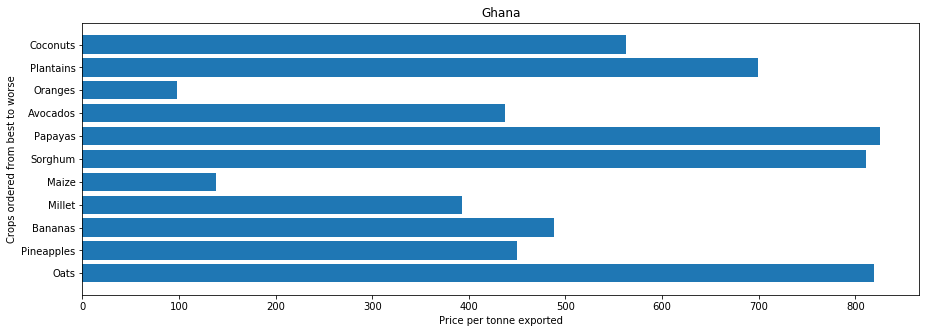

In [139]:
# Get a clean dataframe
Positive=Rendement.drop({'tonne_tonne','tonne_ha','Rank_tt','Rank_th'}, axis=1)

# Get values for South Africa
Positive=Positive[Positive['Area']=='Ghana']
Positive=Positive.sort_values('pos_coef', ascending=True)

#Get Get only the column we want
hist_pos=pd.DataFrame({'Item': Positive['Item'],'dollard_tonne': Positive['dollard_tonne']})
hist_pos=hist_pos.reset_index().drop('index', axis=1)

# Plot the histogram
plt.figure(figsize=(15,5))
plt.barh(hist_pos.Item, hist_pos.dollard_tonne)
plt.xlabel('Price per tonne exported')
plt.ylabel('Crops ordered from best to worse')
plt.title('Ghana')
plt.gca().invert_yaxis()
plt.show()

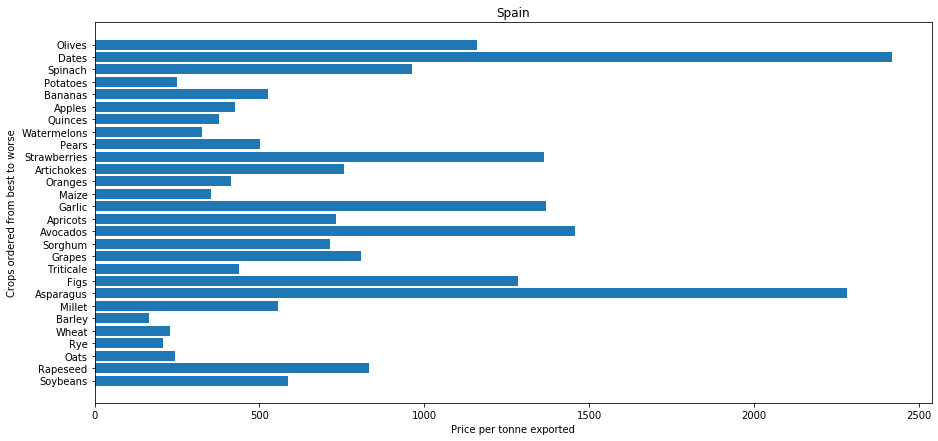

In [140]:
# Get a clean dataframe
Positive=Rendement.drop({'tonne_tonne','tonne_ha','Rank_tt','Rank_th'}, axis=1)

# Get values for South Africa
Positive=Positive[Positive['Area']=='Spain']
Positive=Positive.sort_values('pos_coef', ascending=True)

#Get Get only the column we want
hist_pos=pd.DataFrame({'Item': Positive['Item'],'dollard_tonne': Positive['dollard_tonne']})
hist_pos=hist_pos.reset_index().drop('index', axis=1)

# Plot the histogram
plt.figure(figsize=(15,7))
plt.barh(hist_pos.Item, hist_pos.dollard_tonne)
plt.xlabel('Price per tonne exported')
plt.ylabel('Crops ordered from best to worse')
plt.title('Spain')
plt.gca().invert_yaxis()
plt.show()

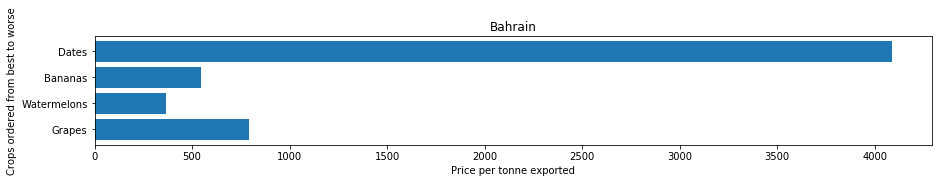

In [141]:
# Get a clean dataframe
Positive=Rendement.drop({'tonne_tonne','tonne_ha','Rank_tt','Rank_th'}, axis=1)

# Get values for Bahrain
Positive=Positive[Positive['Area']=='Bahrain']
Positive=Positive.sort_values('pos_coef', ascending=True)


#Get Get only the column we want
hist_pos=pd.DataFrame({'Item': Positive['Item'],'dollard_tonne': Positive['dollard_tonne']})
hist_pos=hist_pos.reset_index().drop('index', axis=1)

# Plot the histogram
plt.figure(figsize=(15,2))
plt.barh(hist_pos.Item, hist_pos.dollard_tonne)
plt.xlabel('Price per tonne exported')
plt.ylabel('Crops ordered from best to worse')
plt.title('Bahrain')
plt.gca().invert_yaxis()
plt.show()

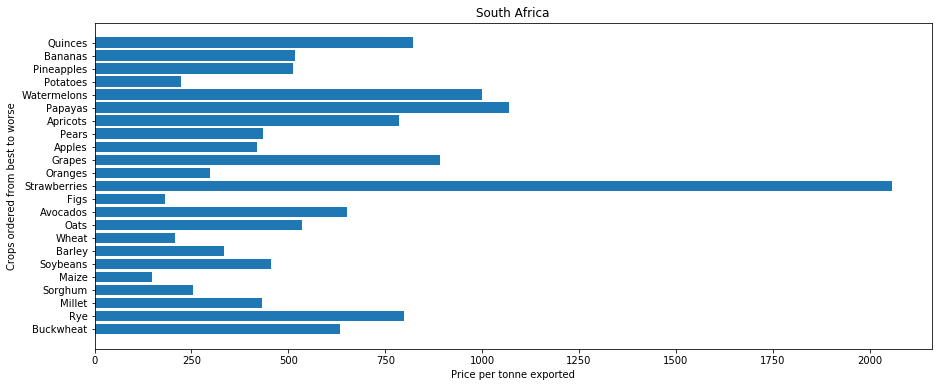

In [142]:
# Get a clean dataframe
Positive=Rendement.drop({'tonne_tonne','tonne_ha','Rank_tt','Rank_th'}, axis=1)

# Get values for South Africa
Positive=Positive[Positive['Area']=='South Africa']
Positive=Positive.sort_values('pos_coef', ascending=True)

#Get Get only the column we want
hist_pos=pd.DataFrame({'Item': Positive['Item'],'dollard_tonne': Positive['dollard_tonne']})
hist_pos=hist_pos.reset_index().drop('index', axis=1)

# Plot the histogram
plt.figure(figsize=(15,6))
plt.barh(hist_pos.Item, hist_pos.dollard_tonne)
plt.xlabel('Price per tonne exported')
plt.ylabel('Crops ordered from best to worse')
plt.title('South Africa')
plt.gca().invert_yaxis()
plt.show()